In [1]:
library("tidyverse")
library("pheatmap")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load the cleaned and vst normalized data

In [2]:
# Load the counts data
counts <- read.csv("data/PDAC_MICRODISSEC_NAIF/results/cts_filt_vst.csv",
                   row.names = 1)

# Load the sample information data
sample_info <- read.csv("data/PDAC_MICRODISSEC_NAIF/results/coldata_filt.csv",
                        row.names = 1)

# Load the immuno counts data extracted from the vst counts

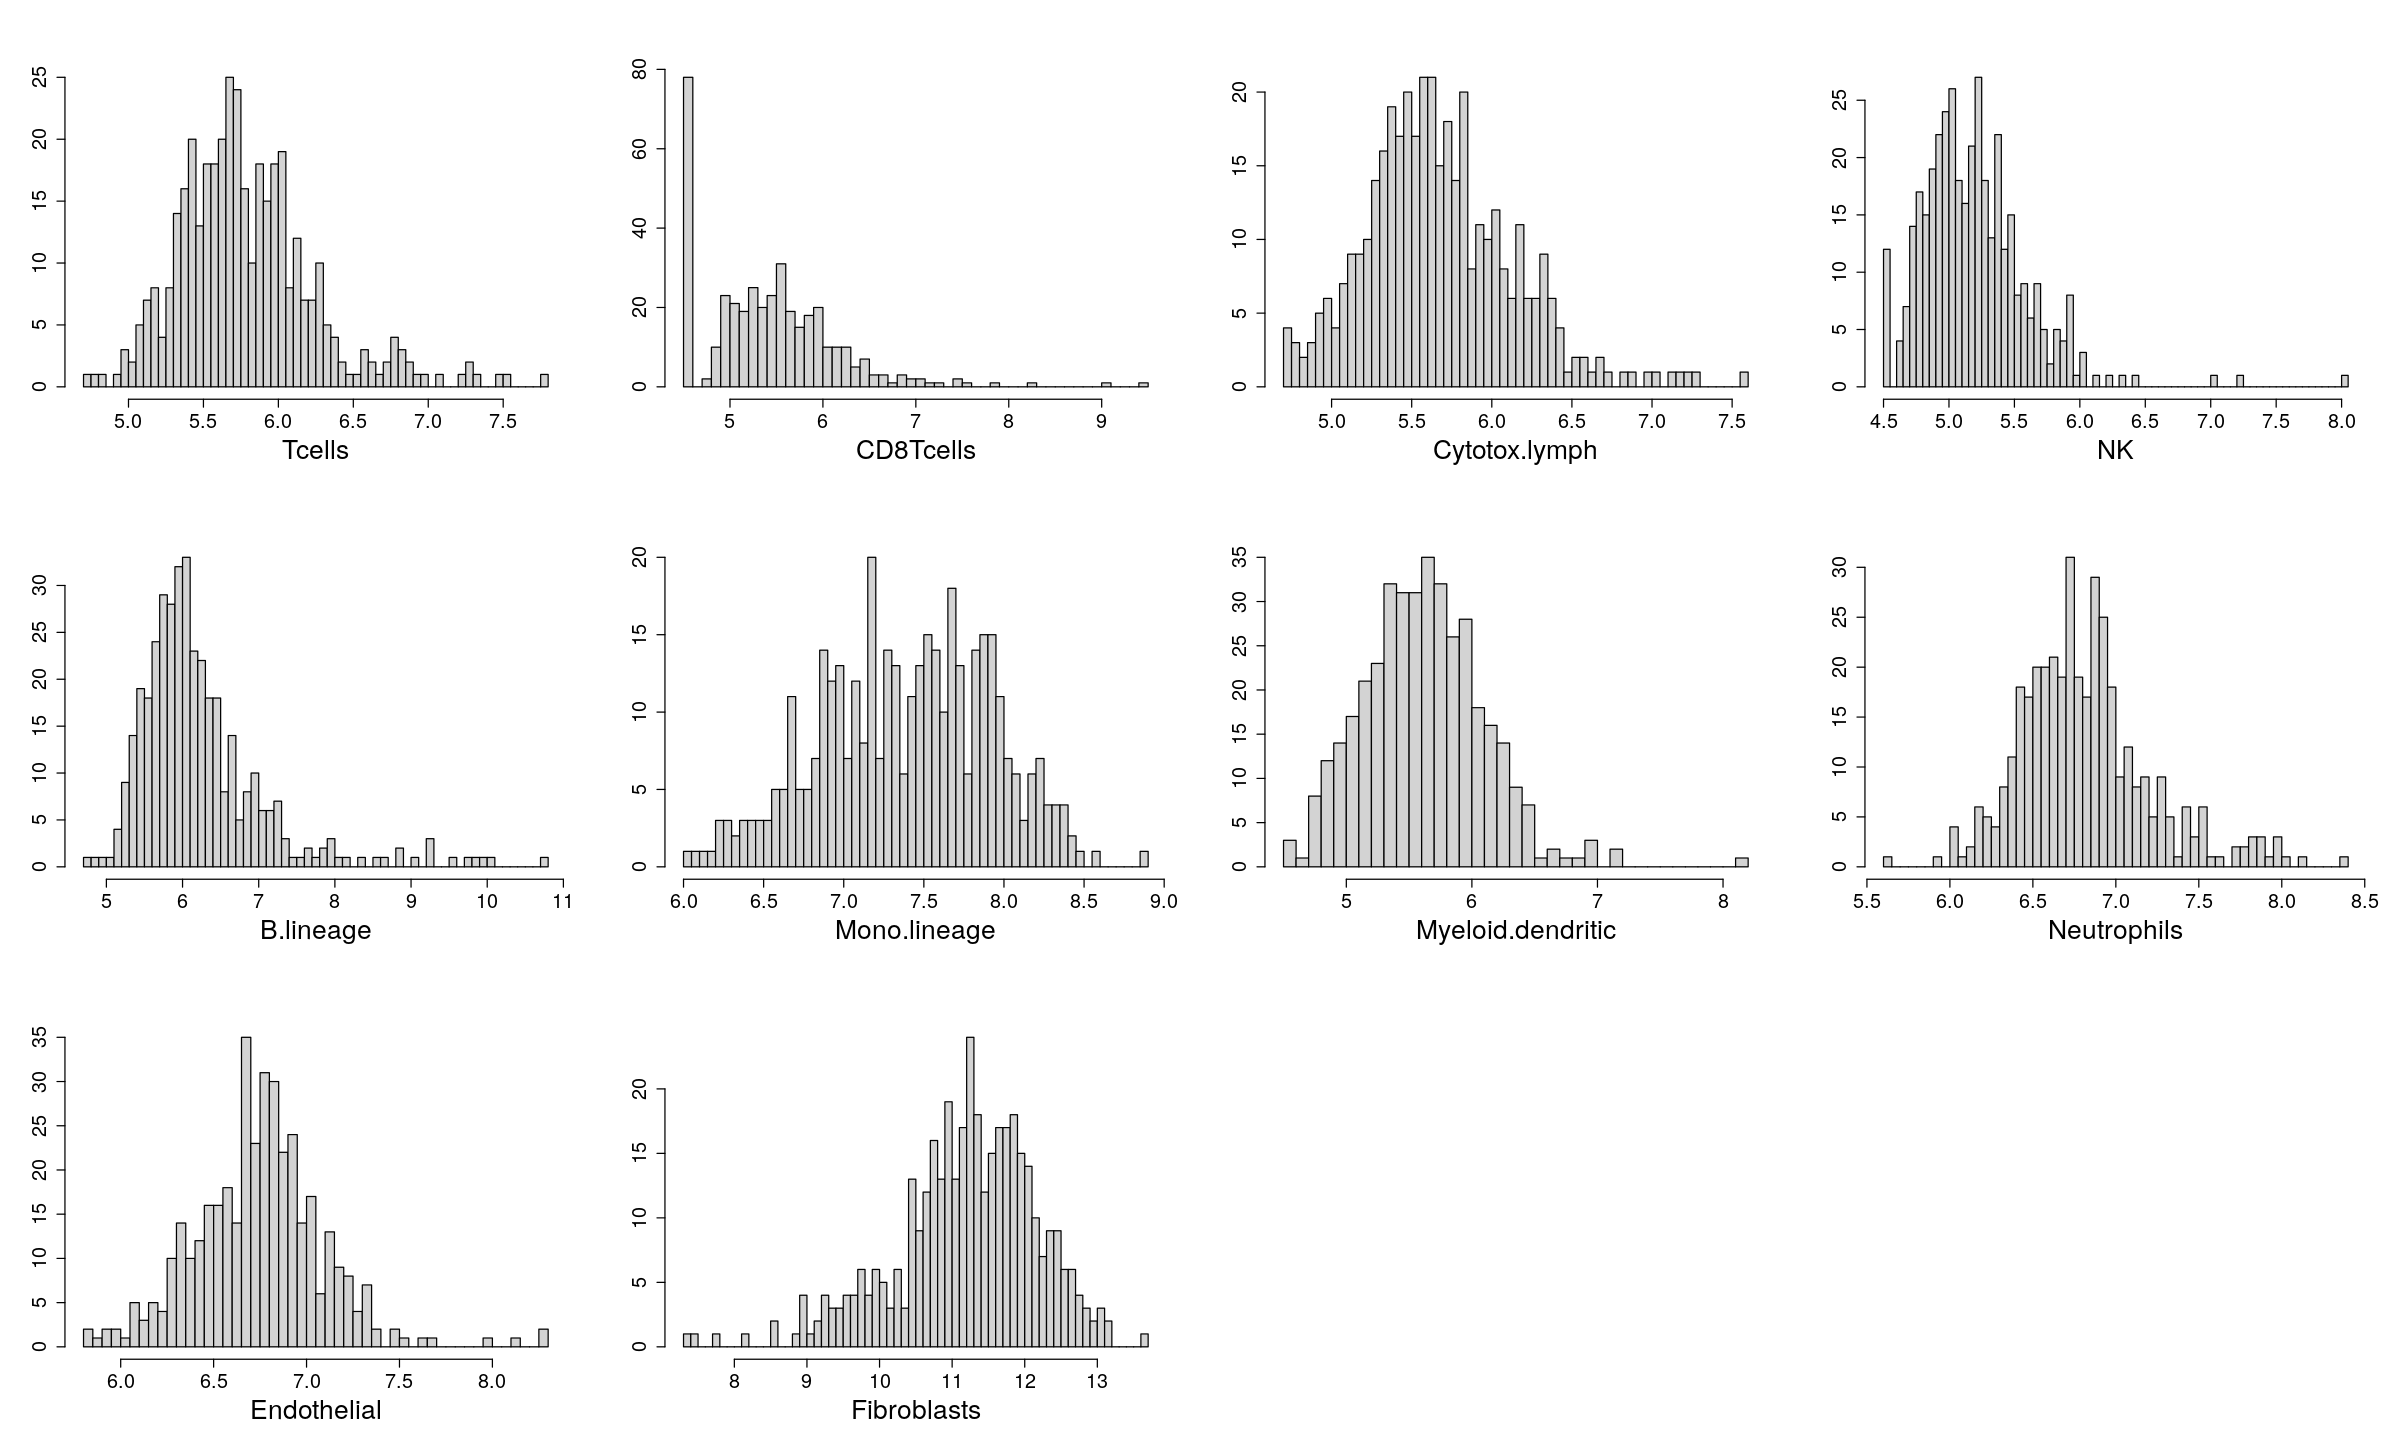

In [3]:
# load the immuno counts data
immuno_counts <- read.csv("data/PDAC_MICRODISSEC_NAIF/results/immuno_counts.csv",
                          row.names = 1)

# Draw a histogram of all immune cells counts
options(repr.plot.width = 20, repr.plot.height = 12)
par(mfrow = c(3, 4))
for (celltype in colnames(immuno_counts)){
  hist(immuno_counts[[celltype]],
       ylab = "",
       xlab = celltype,
       breaks = 50,
       main = "",
       cex.axis = 1.5,
       cex.lab = 2)
}

# Load the correlations data between immune cell counts and the gene counts

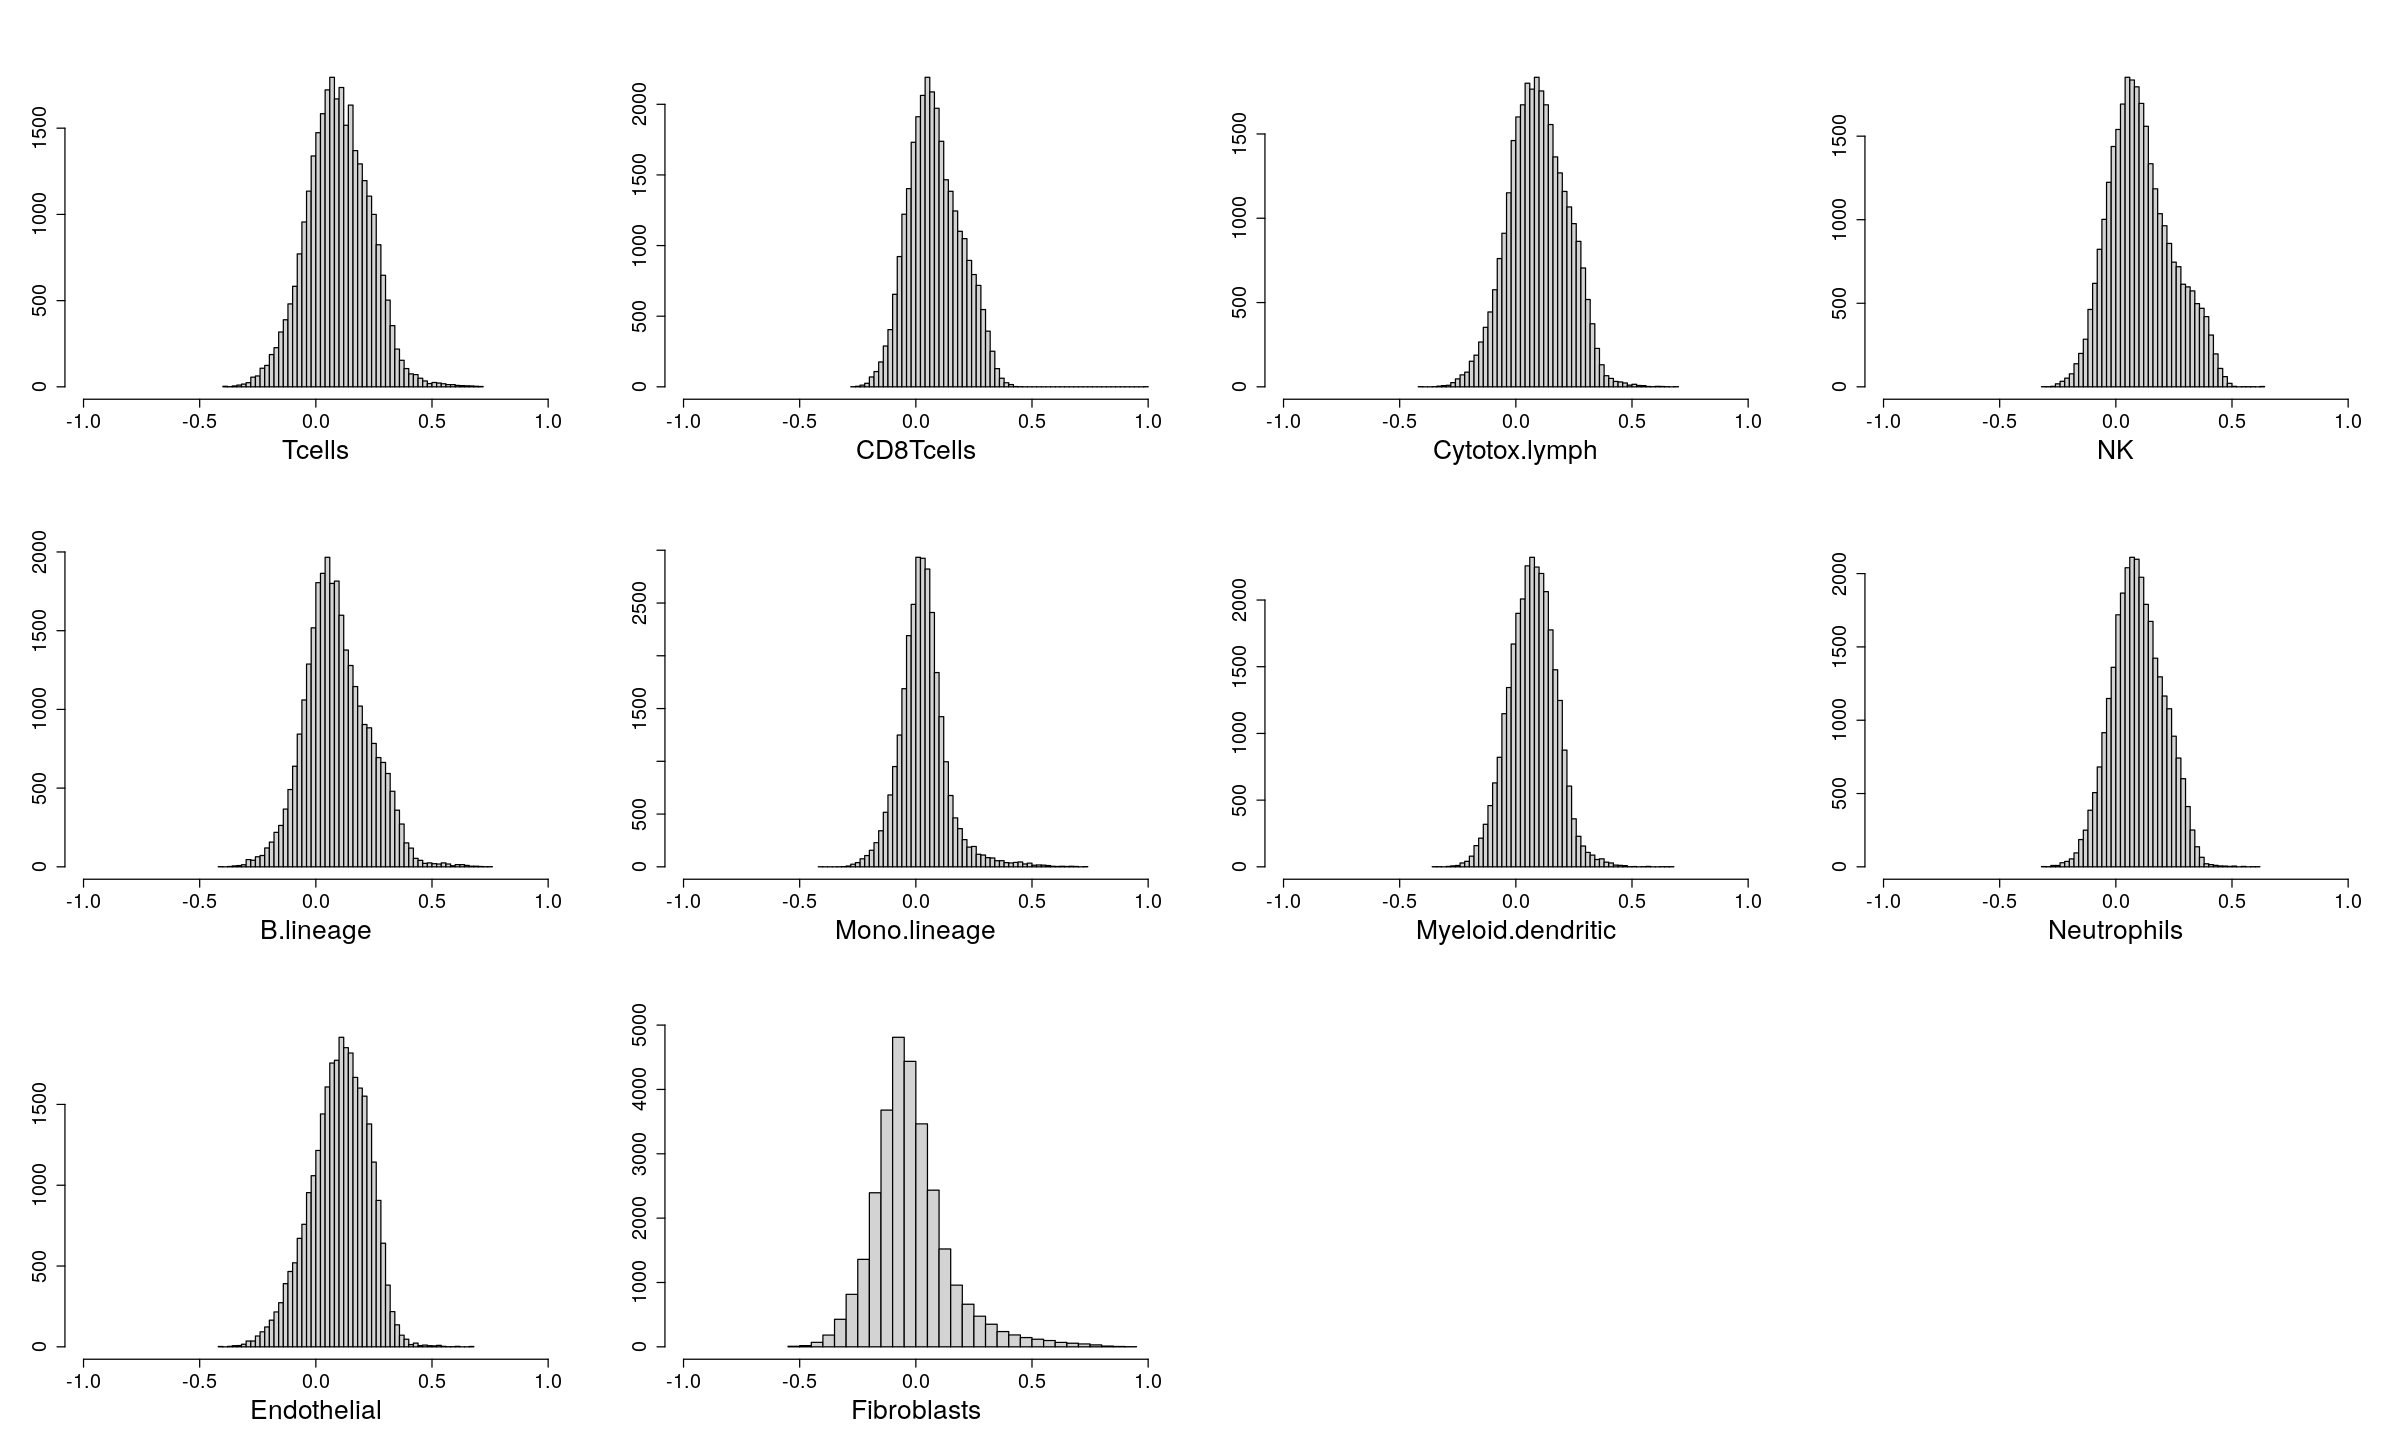

In [4]:
# Load the correlations data between immune cell counts and the gene counts
correlations <- read.csv("data/PDAC_MICRODISSEC_NAIF/results/correlations.csv",
                         row.names = 1)

# Draw the histogram of the correlations for all the immune cell types
options(repr.plot.width = 20, repr.plot.height = 12)
par(mfrow = c(3, 4))

for (i in seq_along(colnames(correlations))){
  hist(correlations[, i],
       xlim = c(-1, 1),
       ylab = "",
       xlab = colnames(correlations)[i],
       breaks = 50,
       main = "",
       cex.axis = 1.5,
       cex.lab = 2)
}

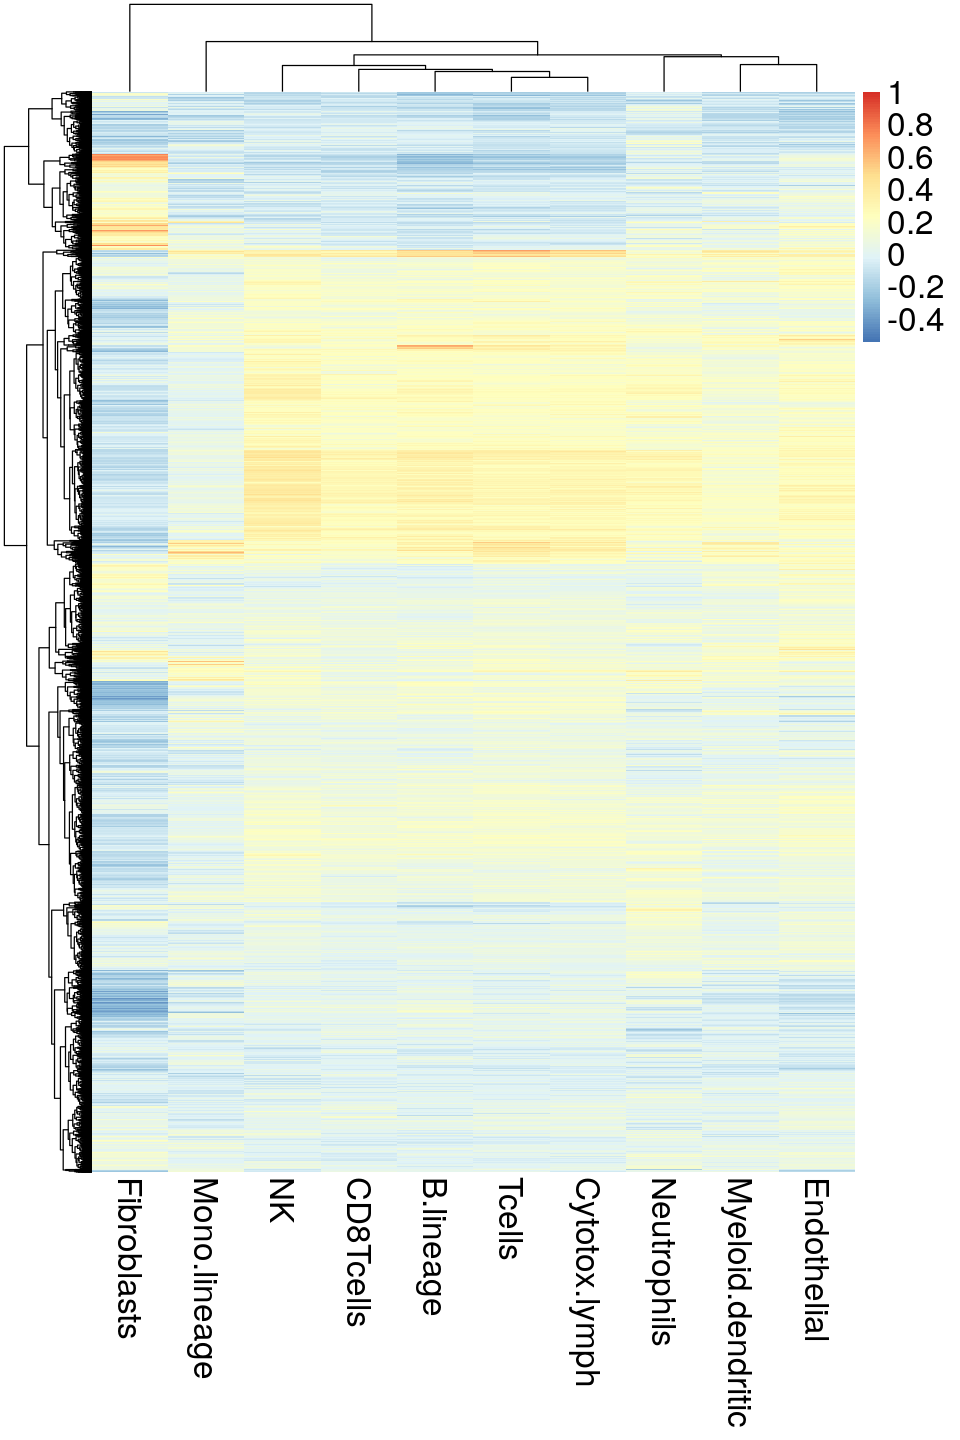

In [5]:
# Draw a heatmap of the correlations
options(repr.plot.width = 8, repr.plot.height = 12)
correlations |>
  as.matrix() |>
  pheatmap(show_rownames = FALSE,
           fontsize = 20)

## Include only the marisome genes 
Using `Hs Matrisome Masterlist 2012` list we study the correlation between the immuno cells counts and the matrisome genes

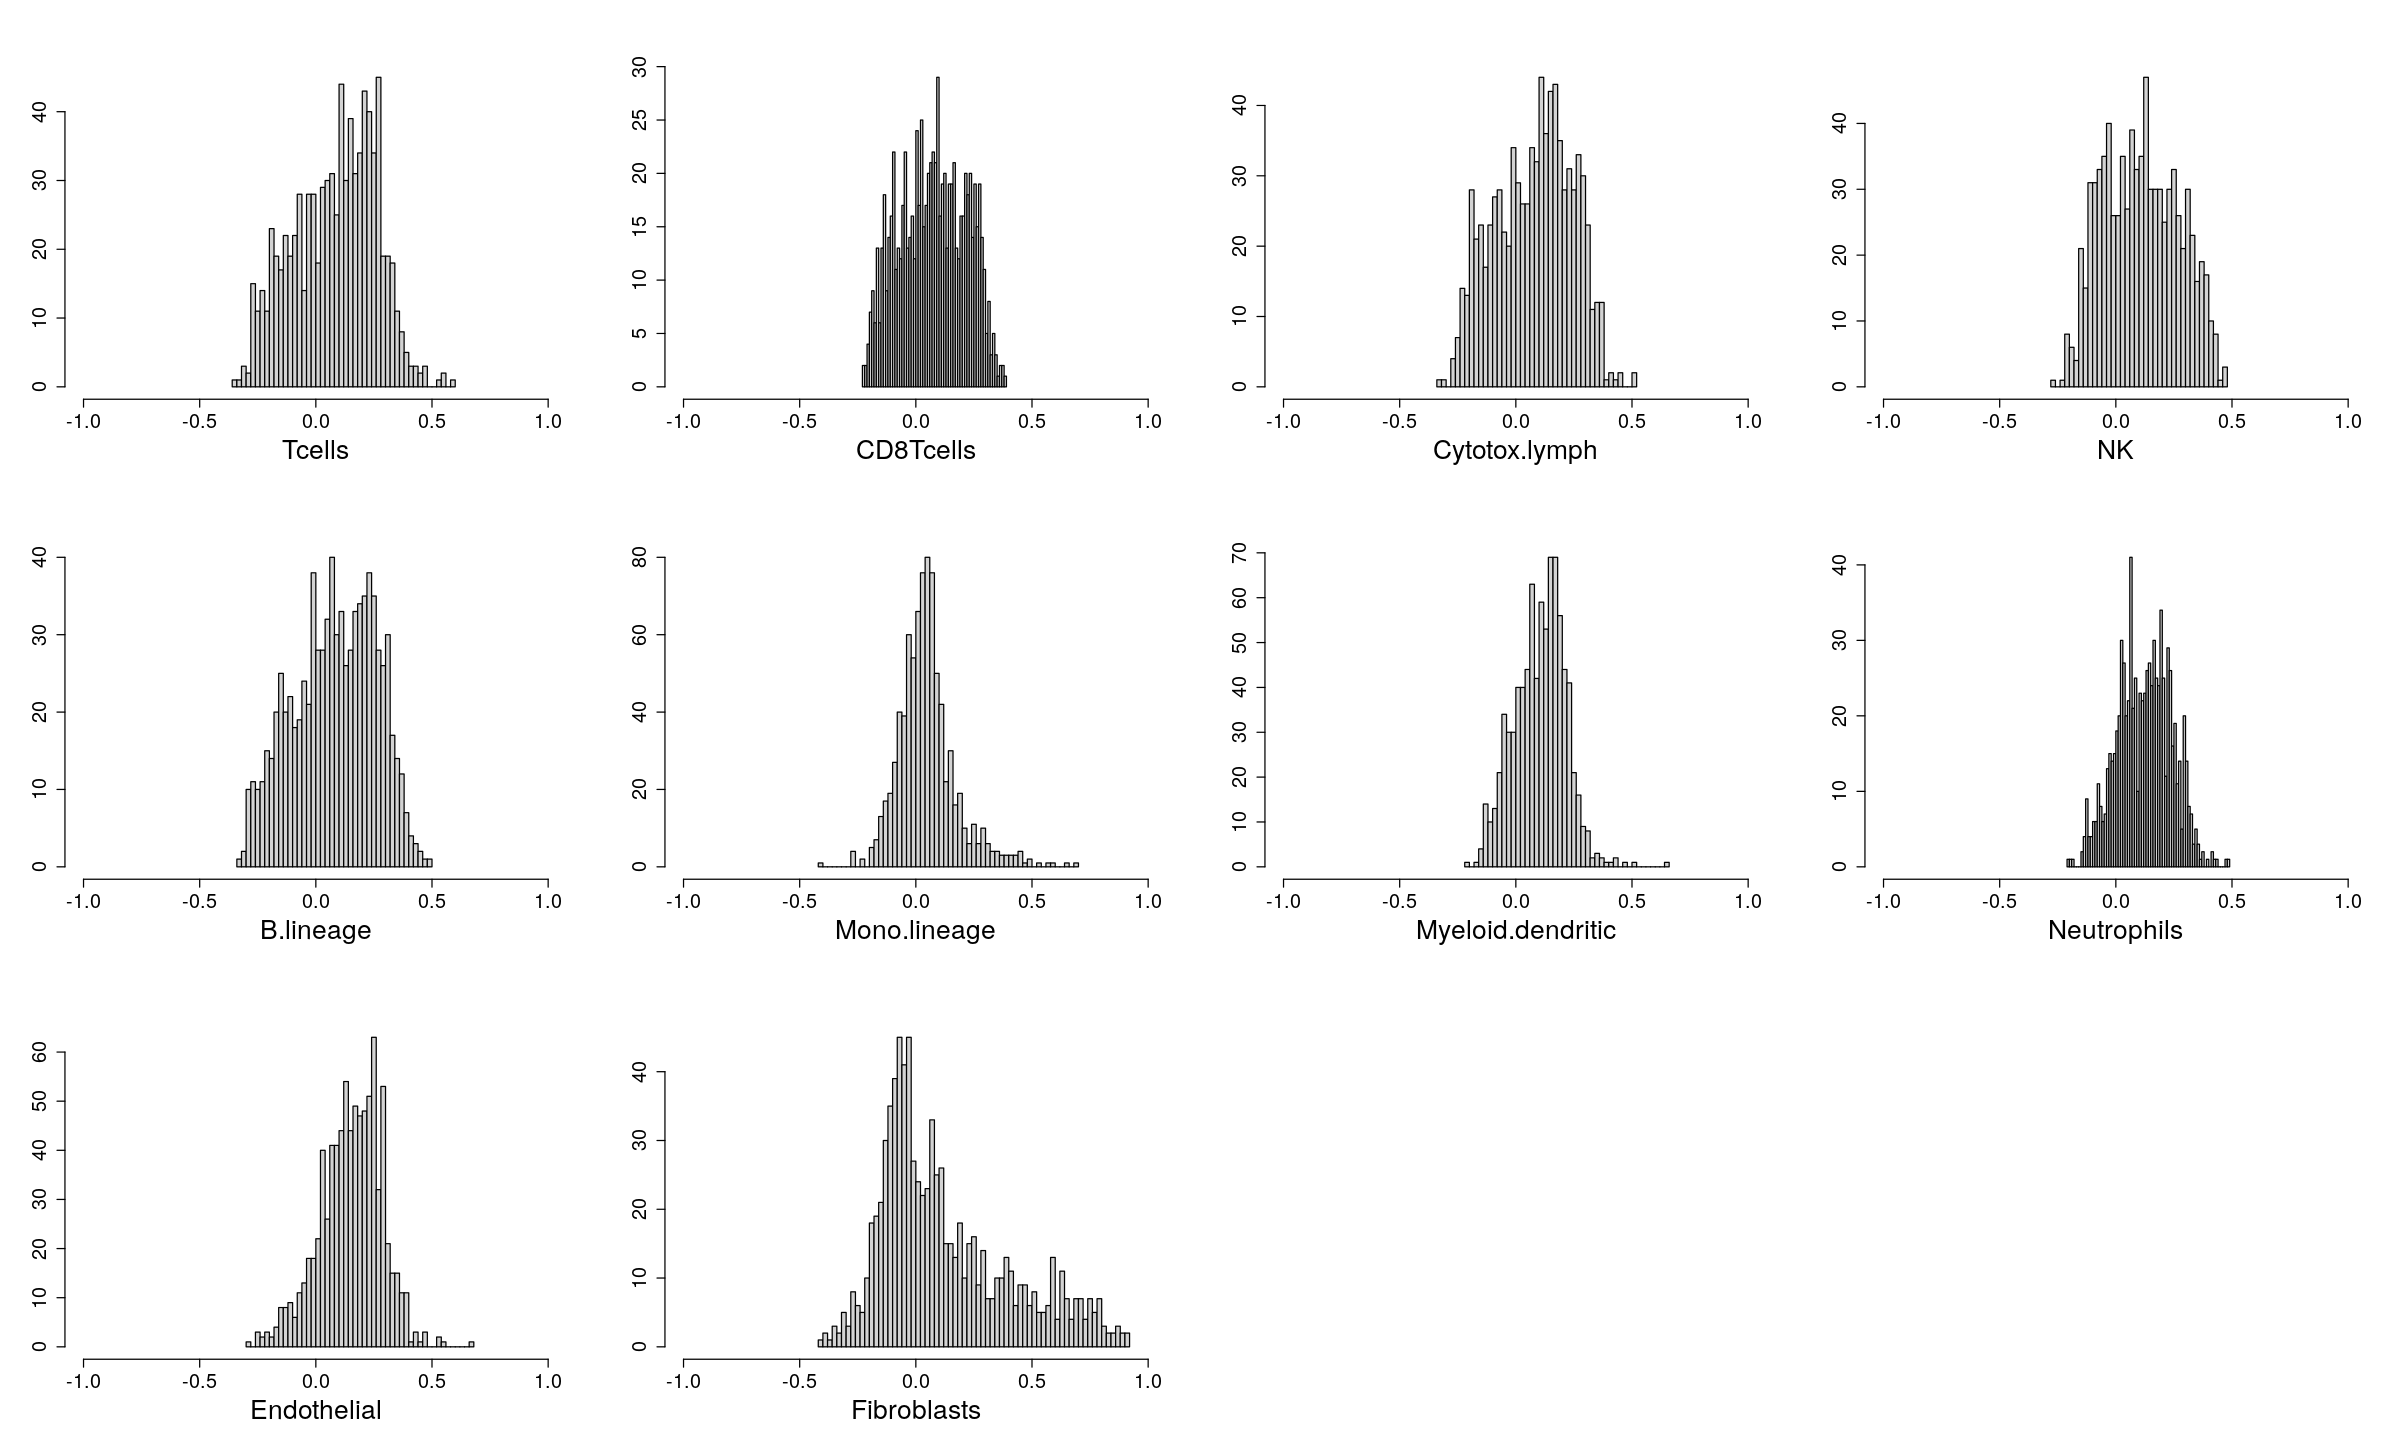

In [6]:
# Load the gene annotations table
geneannot <- read.delim("data/PDAC_MICRODISSEC_NAIF/geneAnnot.tsv", sep = "\t")

# Transform the gene ids into gene symbols using the annotation table
gene_symbols <- geneannot$GeneName[match(rownames(counts), geneannot$GeneID)]

# Load the matrisome genes list
matrisome_genes <- read.csv("Hs_Matrisome_Masterlist_2012.csv")

# Take the correlation of the matrisome genes with the immune cell types
correlations_matrisome <- correlations[match(matrisome_genes$Gene.Symbol, gene_symbols), ]

# Remove the nan values
correlations_matrisome <- correlations_matrisome[complete.cases(correlations_matrisome), ]

# Draw the histogram of the correlations for all the immune cell types
options(repr.plot.width = 20, repr.plot.height = 12)
par(mfrow = c(3, 4))

for (i in seq_along(colnames(correlations_matrisome))){
  hist(correlations_matrisome[, i],
       xlim = c(-1, 1),
       ylab = "",
       xlab = colnames(correlations_matrisome)[i],
       breaks = 50,
       main = "",
       cex.axis = 1.5,
       cex.lab = 2)
}

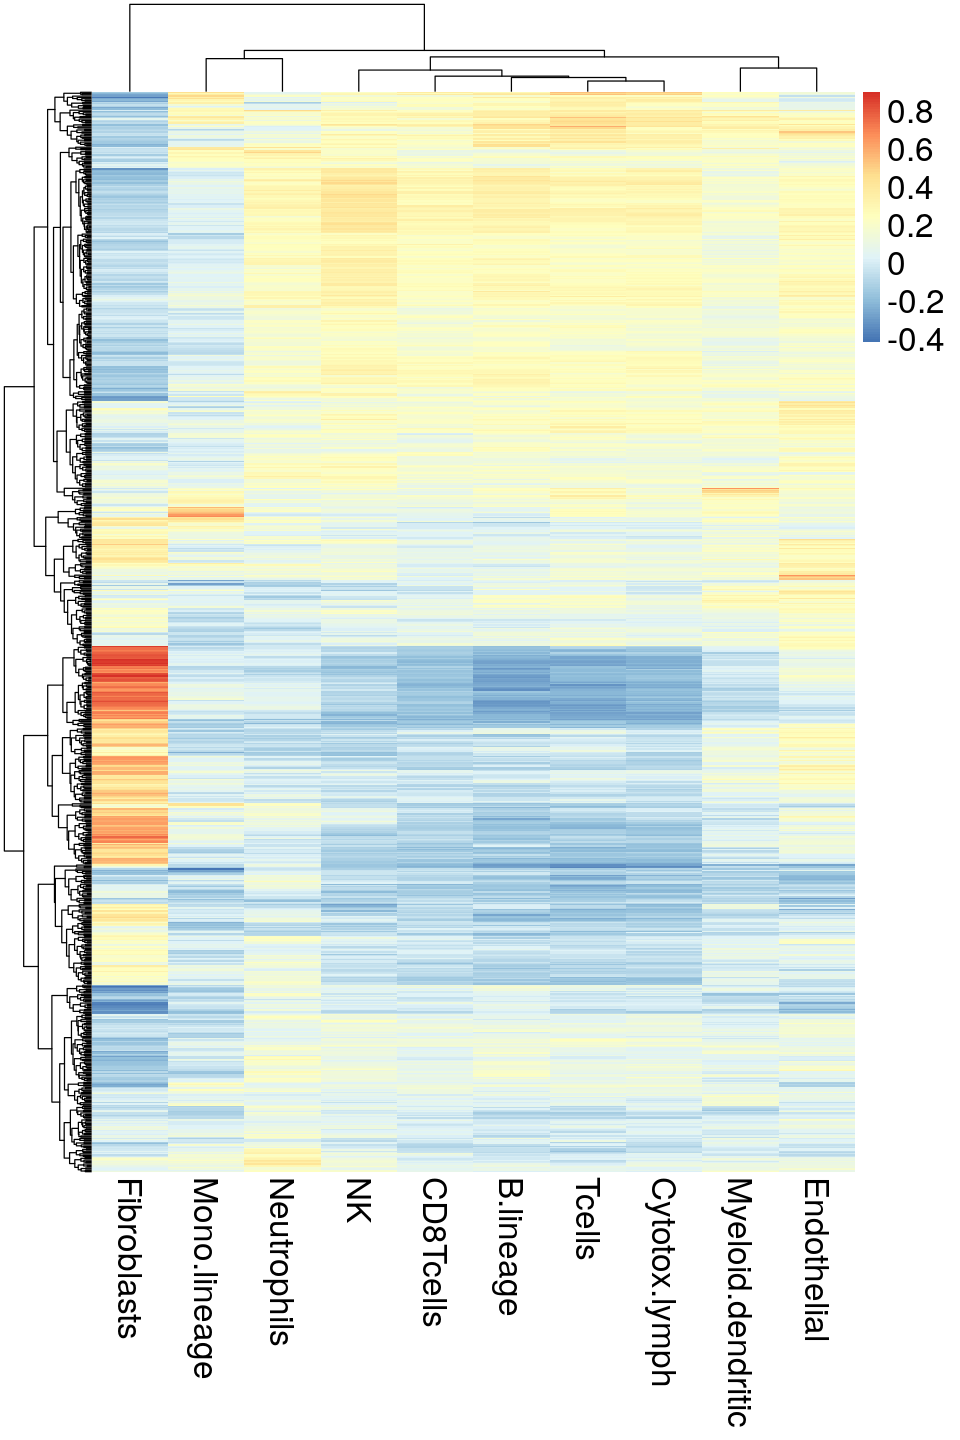

In [7]:
# Draw a heatmap of the correlations containing only the matrisome genes
options(repr.plot.width = 8, repr.plot.height = 12)
correlations_matrisome |>
  pheatmap(show_rownames = FALSE,
           fontsize = 20)

In [8]:
# Find the top 10 genes that are most correlated with each immune cell type
top10_genes <- lapply(colnames(correlations_matrisome), function(cell_type) {
  top_genes <- row.names(correlations_matrisome)[order(abs(correlations_matrisome[, cell_type]),
                                             decreasing = TRUE)[1:20]]
  gene_symbols[match(top_genes, rownames(counts))]
}) |>
  as.data.frame() |>
  set_names(colnames(correlations_matrisome))

top10_genes

Tcells,CD8Tcells,Cytotox.lymph,NK,B.lineage,Mono.lineage,Myeloid.dendritic,Neutrophils,Endothelial,Fibroblasts
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SPOCK2,CXCL9,CCL5,ITIH1,COL19A1,C1QC,CLEC10A,CXCL5,VWF,COL6A2
CXCL9,FREM3,CXCL9,MUC19,CLEC17A,C1QB,CCL17,MMP25,EMCN,COL6A3
TNFSF8,CCL5,CXCL13,NELL1,COL4A3,C1QA,CCL22,CLEC4E,EGFL7,COL5A2
CCL5,CLEC17A,CCL4,ADAM18,COL4A4,CLEC7A,LTB,CXCL6,MMRN1,COL3A1
CCL4,LTA,TNFSF8,ISM2,CCL19,CTSC,FCN1,CXCL8,CLEC14A,COL5A1
CXCL13,ADAMTS19,SPOCK2,NCAN,TNR,SRGN,S100B,ZPLD1,ADAMTS4,EMILIN1
CCL19,FBN3,MMP25,KNG1,SPOCK2,EMILIN2,MMP25,IGFBP1,SEMA3G,COL1A2
EBI3,COL19A1,VWC2,BMP10,MUC19,CTSS,CCL19,MUC19,ADAMTS1,COL1A1
TNFSF14,CLEC4M,CLEC17A,COL19A1,CXCL9,CCL5,TNFSF8,SERPINB4,PGF,FSTL1


In [9]:
# Find the top 10 genes that are most correlated with each immune cell type
top10_correlations <- lapply(colnames(correlations_matrisome), function(cell_type) {
  top_genes <- correlations_matrisome[order(abs(correlations_matrisome[, cell_type]),
      decreasing = TRUE)[1:20], cell_type]
}) |>
  as.data.frame() |>
  set_names(colnames(correlations_matrisome))

top10_correlations

Tcells,CD8Tcells,Cytotox.lymph,NK,B.lineage,Mono.lineage,Myeloid.dendritic,Neutrophils,Endothelial,Fibroblasts
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5880926,0.3899476,0.5092911,0.4749670,0.4854388,0.6849149,0.6548187,0.4871609,0.6641648,0.9024747
0.5467015,0.3734977,0.5077735,0.4737776,0.4603010,0.6476118,0.5043874,0.4791544,0.5421407,0.9015881
0.5427585,0.3713600,0.4582369,0.4717655,0.4562475,0.5860033,0.4798191,0.4314427,0.5317605,0.8893986
0.5389542,0.3658138,0.4478901,0.4508865,0.4520633,0.5689475,0.4371338,0.4215558,0.5262877,0.8877290
0.4769446,0.3614697,0.4348337,0.4347484,0.4397043,0.5375735,0.4286441,0.4182483,0.4771547,0.8759282
0.4767371,0.3550371,0.4186883,0.4332044,0.4260780,0.4986997,0.4007435,0.4106402,0.4670211,0.8686330
0.4724994,0.3459583,0.4028827,0.4320240,0.4251234,0.4932213,0.3832241,0.3950161,0.4642862,0.8673473
0.4555386,0.3433251,0.3982607,0.4273735,0.4190890,0.4745059,0.3720162,0.3772003,0.4475382,0.8441764
0.4522255,0.3405602,0.3775532,0.4270836,0.4150576,0.4549992,0.3646250,0.3733691,0.4310711,0.8440009


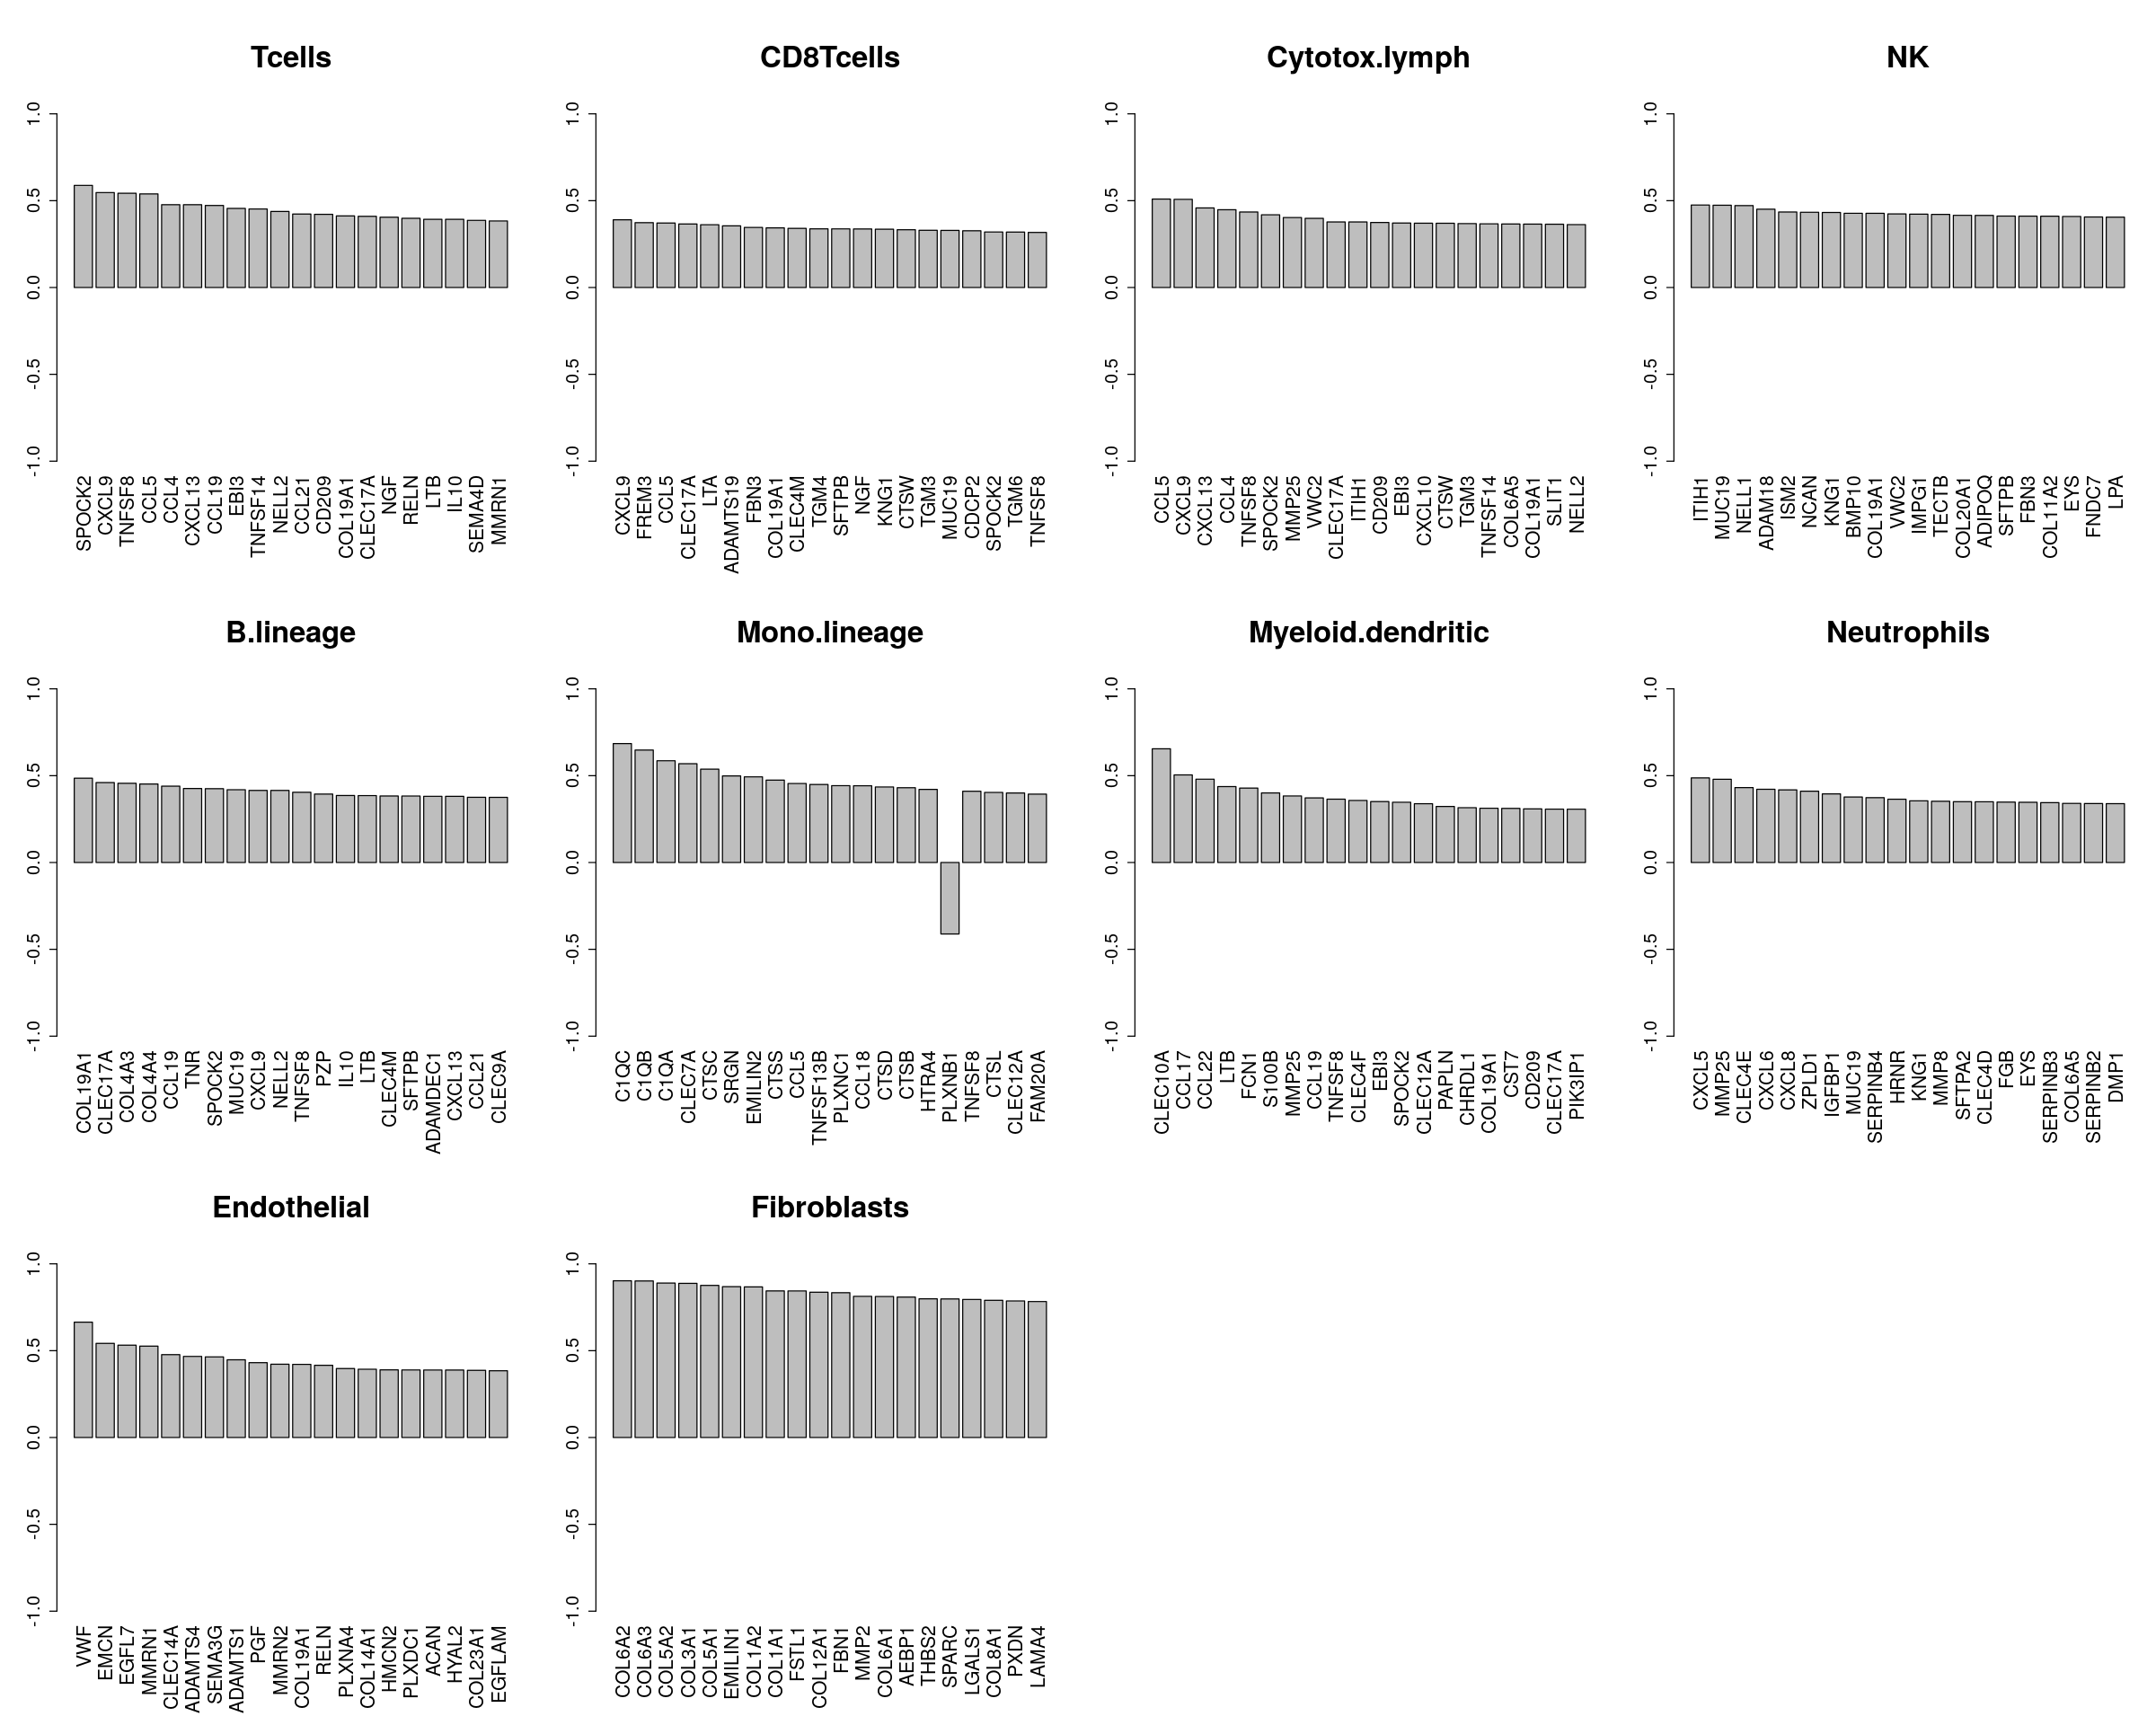

In [10]:
# plot the top 10 genes for each immune cell type
options(repr.plot.width = 20, repr.plot.height = 16)
par(mfrow = c(3, 4), mar = c(8, 4, 8, 1))

for (celltype in colnames(top10_genes)){
  barplot(top10_correlations[[celltype]],
          names.arg = top10_genes[[celltype]],
          las = 3,
          cex.names = 1.6,
          cex.axis = 1.5,
          cex.lab = 3,
          main = celltype,
          ylim = c(-1, 1),
          ylab = "",
          xlab = "",
          cex.main = 2.5)
}

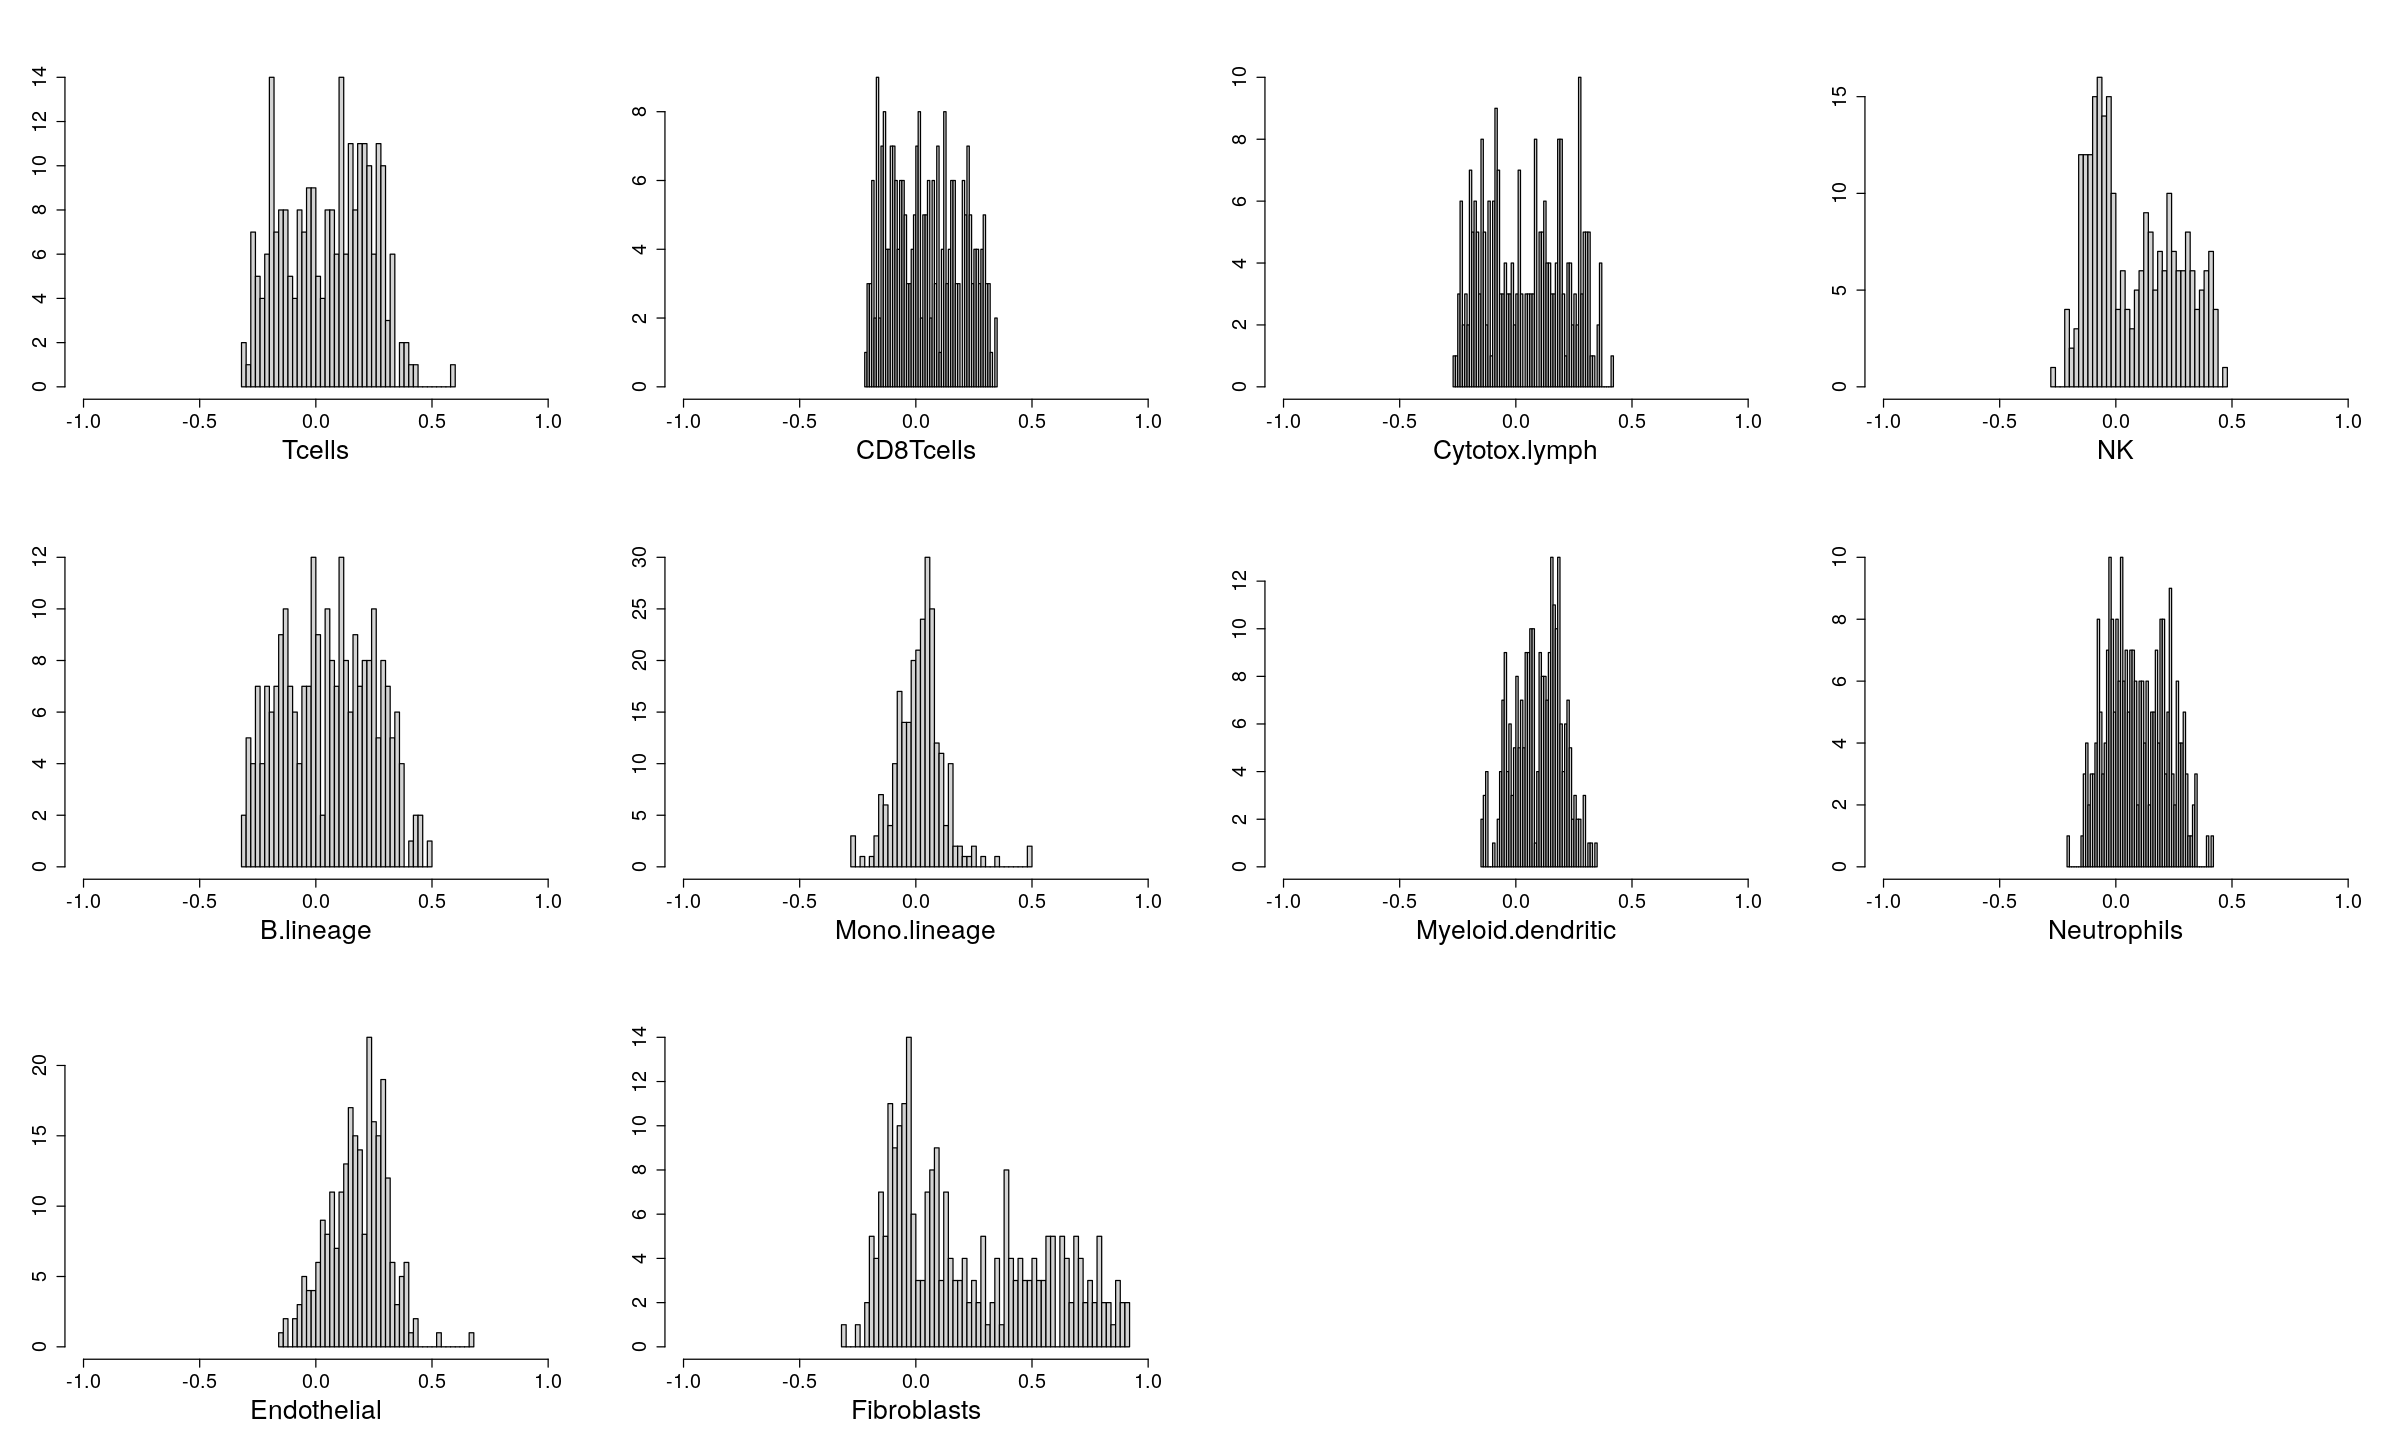

In [11]:
# Filter out the matrisome_genes doesn't belong to the "Core matrisome" division
matrisome_core <- filter(matrisome_genes,
                         matrisome_genes$Matrisome.Division == "Core matrisome")

# Take the correlation of the matrisome core genes with the immune cell types
correlations_mat_core <- correlations[match(matrisome_core$Gene.Symbol,
                                            gene_symbols), ]

# Remove the nan values
correlations_mat_core <- correlations_mat_core[complete.cases(correlations_mat_core), ]

# Draw the histogram of the correlations for all the immune cell types
options(repr.plot.width = 20, repr.plot.height = 12)
par(mfrow = c(3, 4))

for (i in seq_along(colnames(correlations_mat_core))){
  hist(correlations_mat_core[, i],
       xlim = c(-1, 1),
       ylab = "",
       xlab = colnames(correlations_mat_core)[i],
       breaks = 50,
       main = "",
       cex.axis = 1.5,
       cex.lab = 2)
}

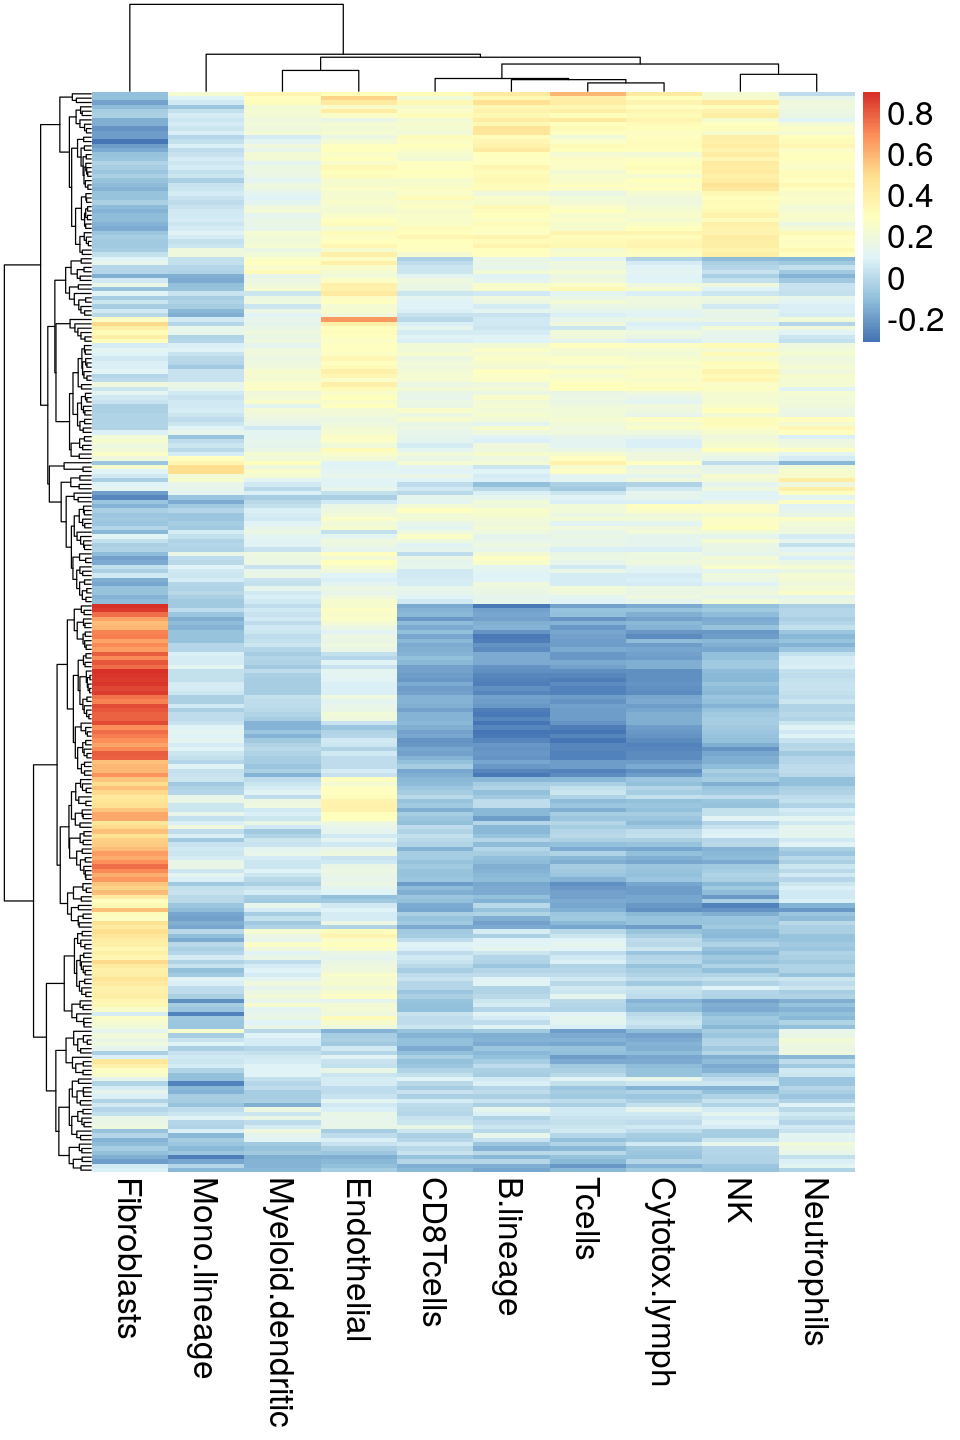

In [12]:
# Draw a heatmap of the correlations containing only the matrisome core genes
options(repr.plot.width = 8, repr.plot.height = 12)
correlations_mat_core |>
  pheatmap(show_rownames = FALSE,
           fontsize = 20)

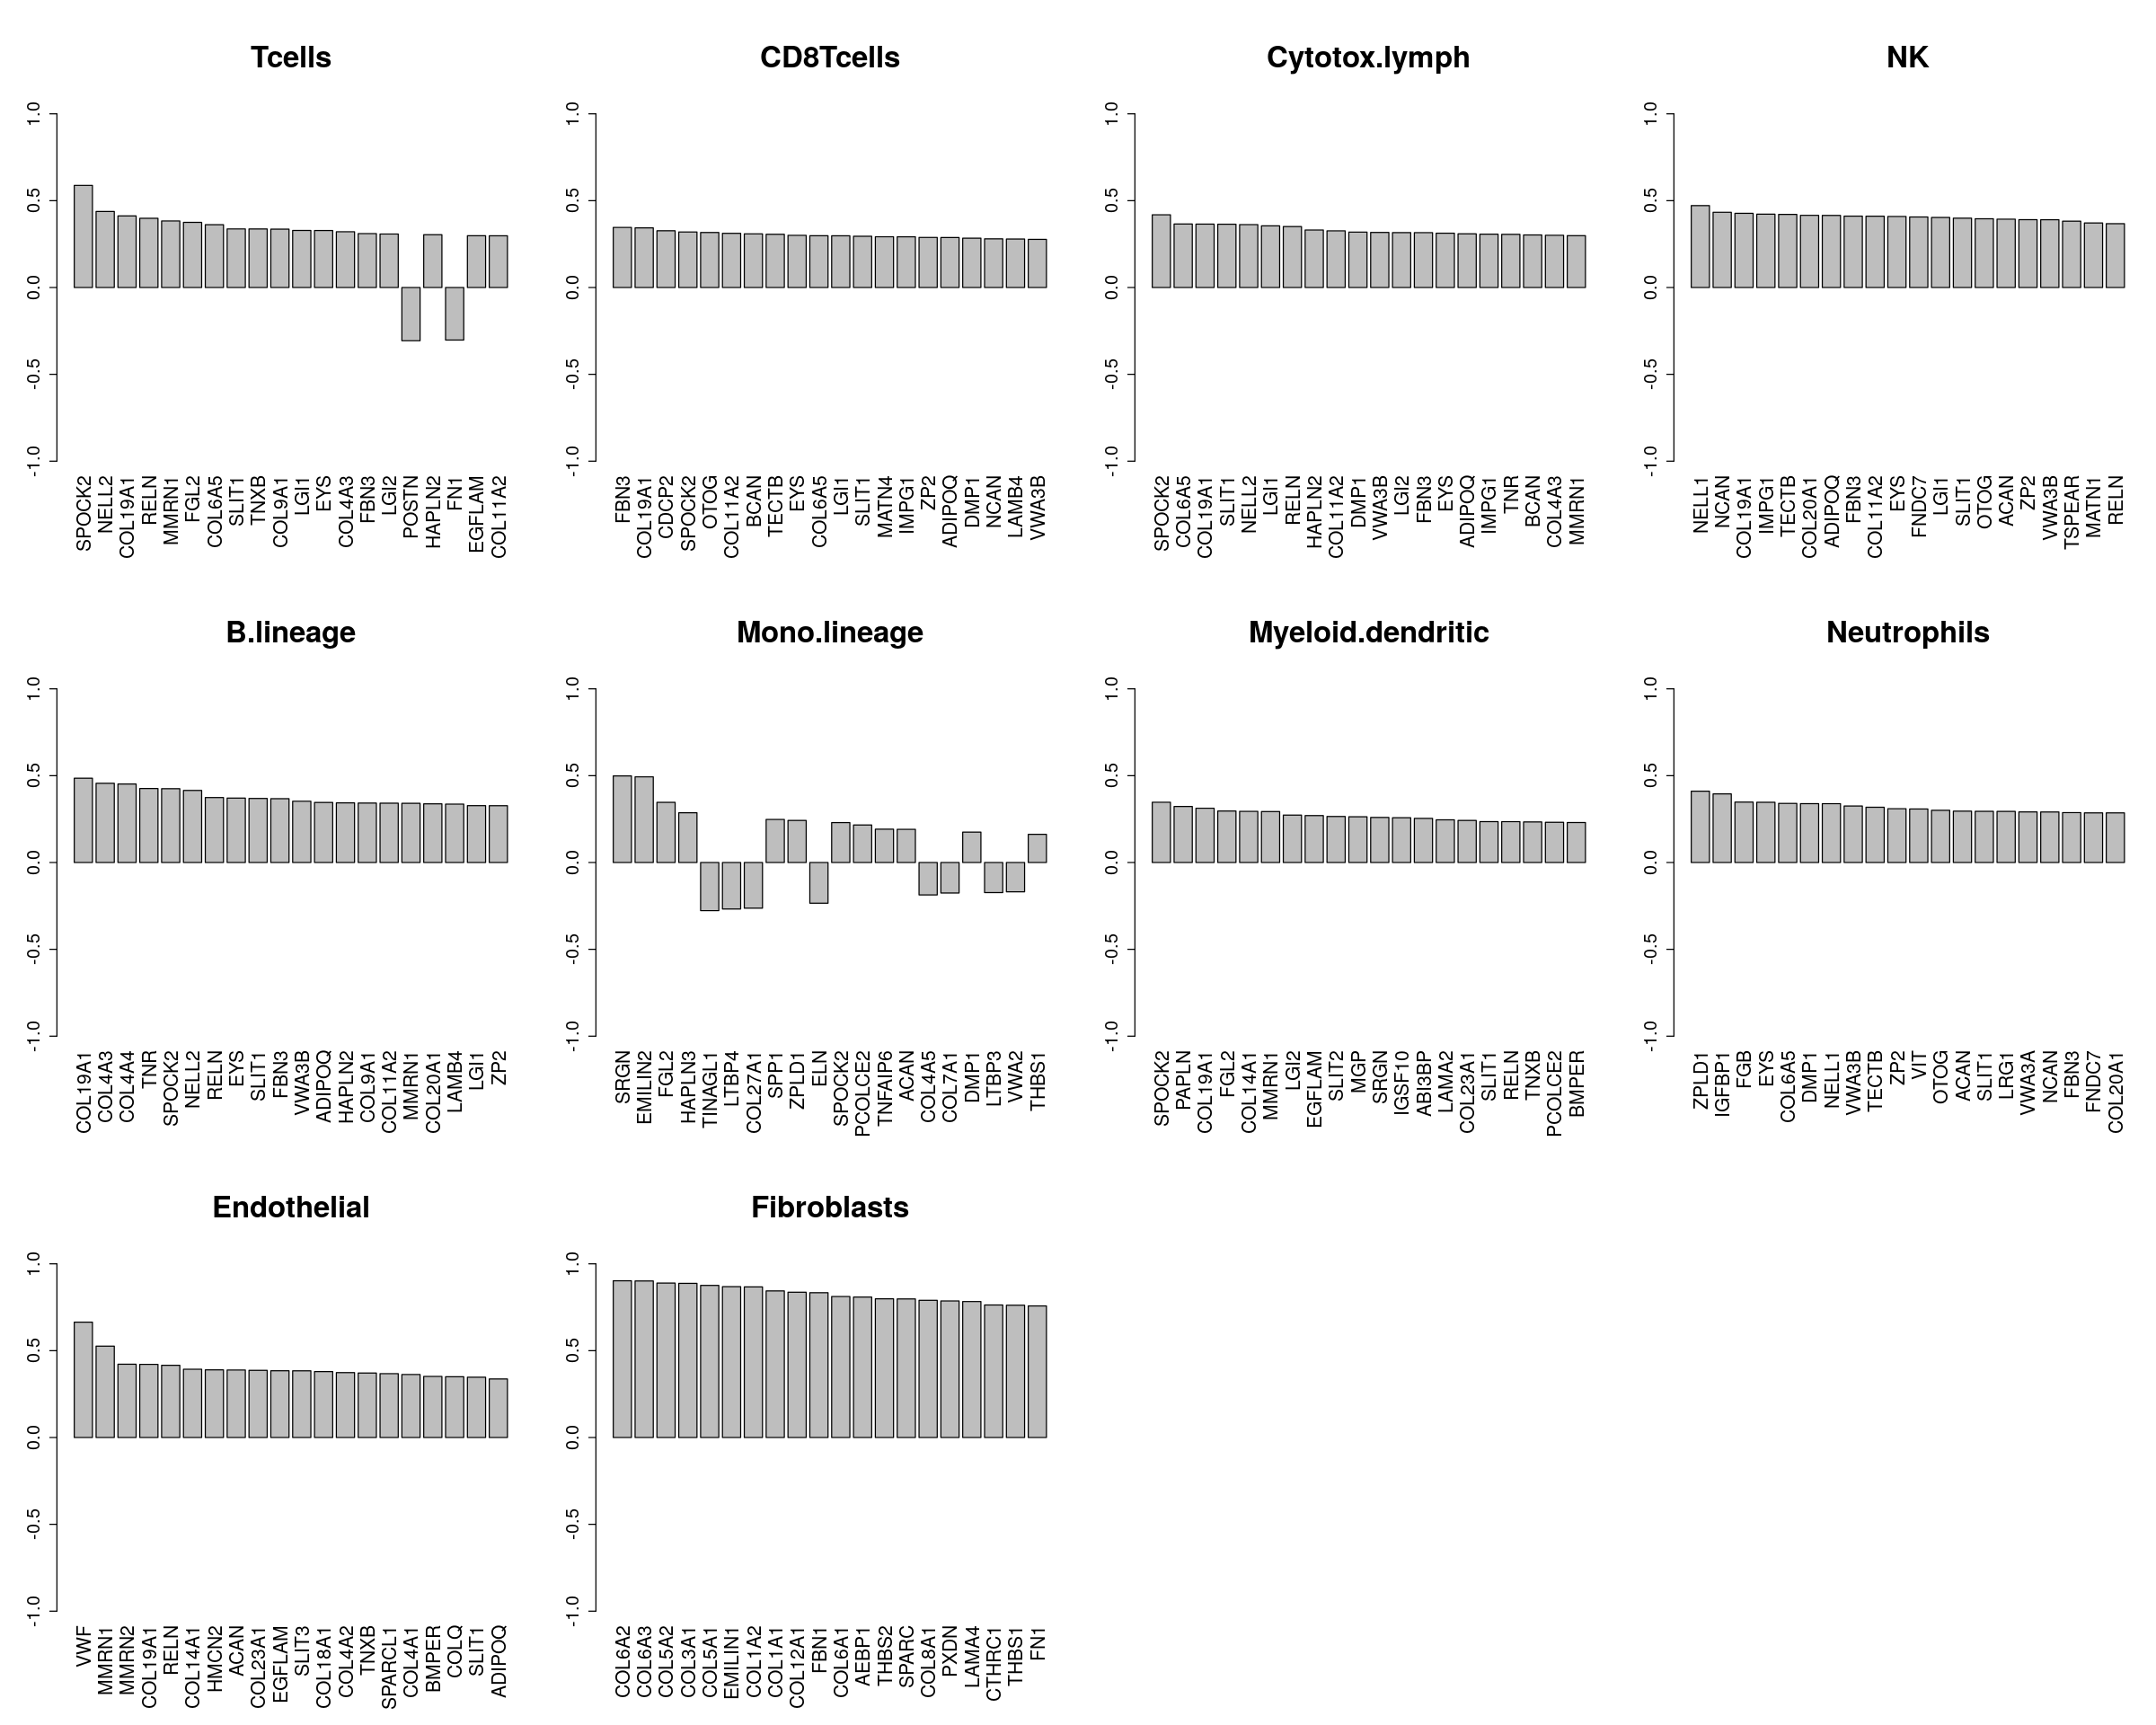

In [13]:
# Find the top 10 genes that are most correlated with each immune cell type
top10_genes <- lapply(colnames(correlations_mat_core), function(cell_type) {
  top_genes <- row.names(correlations_mat_core)[order(abs(correlations_mat_core[, cell_type]),
                                             decreasing = TRUE)[1:20]]
  gene_symbols[match(top_genes, rownames(counts))]
}) |>
  as.data.frame() |>
  set_names(colnames(correlations_mat_core))

# Find the top 10 genes that are most correlated with each immune cell type
top10_correlations <- lapply(colnames(correlations_mat_core), function(cell_type) {
  top_genes <- correlations_mat_core[order(abs(correlations_mat_core[, cell_type]),
      decreasing = TRUE)[1:20], cell_type]
}) |>
  as.data.frame() |>
  set_names(colnames(correlations_mat_core))


# plot the top 10 genes for each immune cell type
options(repr.plot.width = 20, repr.plot.height = 16)
par(mfrow = c(3, 4), mar = c(8, 4, 8, 1))

for (celltype in colnames(top10_genes)){
  barplot(top10_correlations[[celltype]],
          names.arg = top10_genes[[celltype]],
          las = 3,
          cex.names = 1.6,
          cex.axis = 1.5,
          cex.lab = 3,
          main = celltype,
          ylim = c(-1, 1),
          ylab = "",
          xlab = "",
          cex.main = 2.5)
}

In [14]:
# Count the number of genes in each matrisome category
matrisome_genes$Matrisome.Category |>
  table()


              Collagens       ECM Glycoproteins          ECM Regulators 
                     44                     195                     238 
ECM-affiliated Proteins           Proteoglycans        Secreted Factors 
                    171                      35                     344 

In [15]:
# Count the number of core matrisome genes in each matrisome category
matrisome_core$Matrisome.Category |>
  table()


        Collagens ECM Glycoproteins     Proteoglycans 
               44               195                35 

[1] "ECM Glycoproteins"


[1] "Collagens"


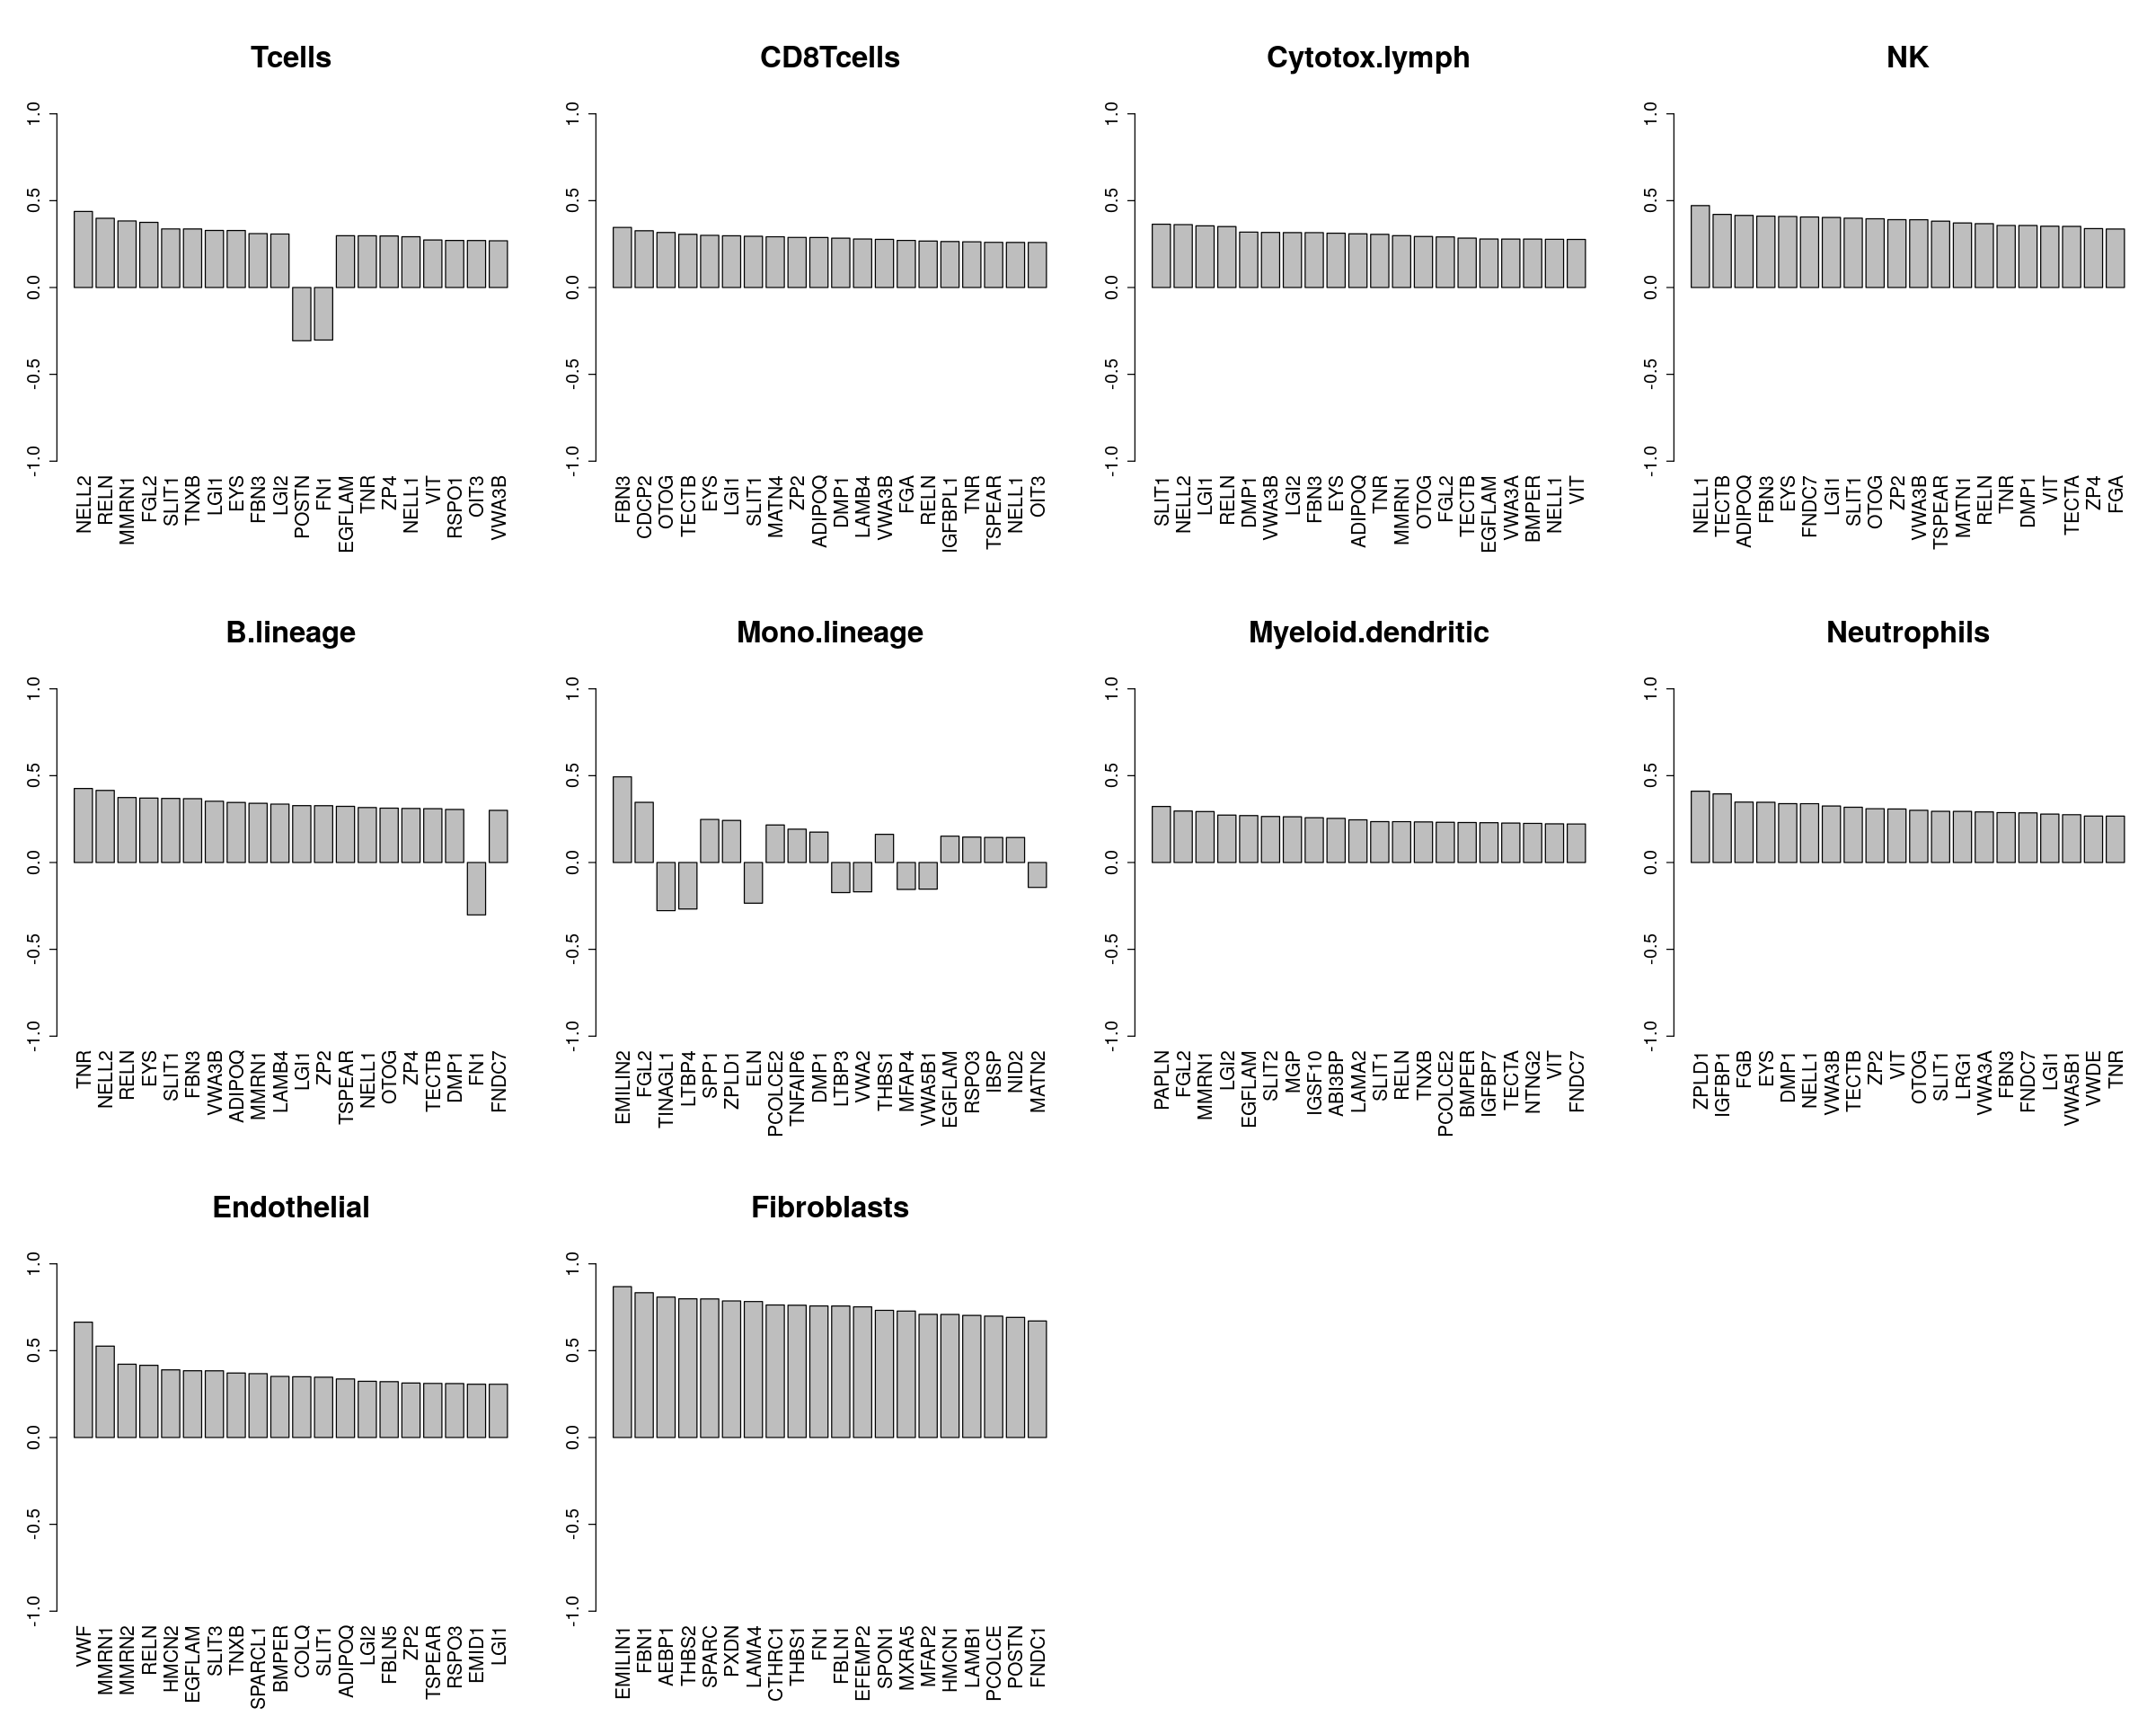

[1] "Proteoglycans"


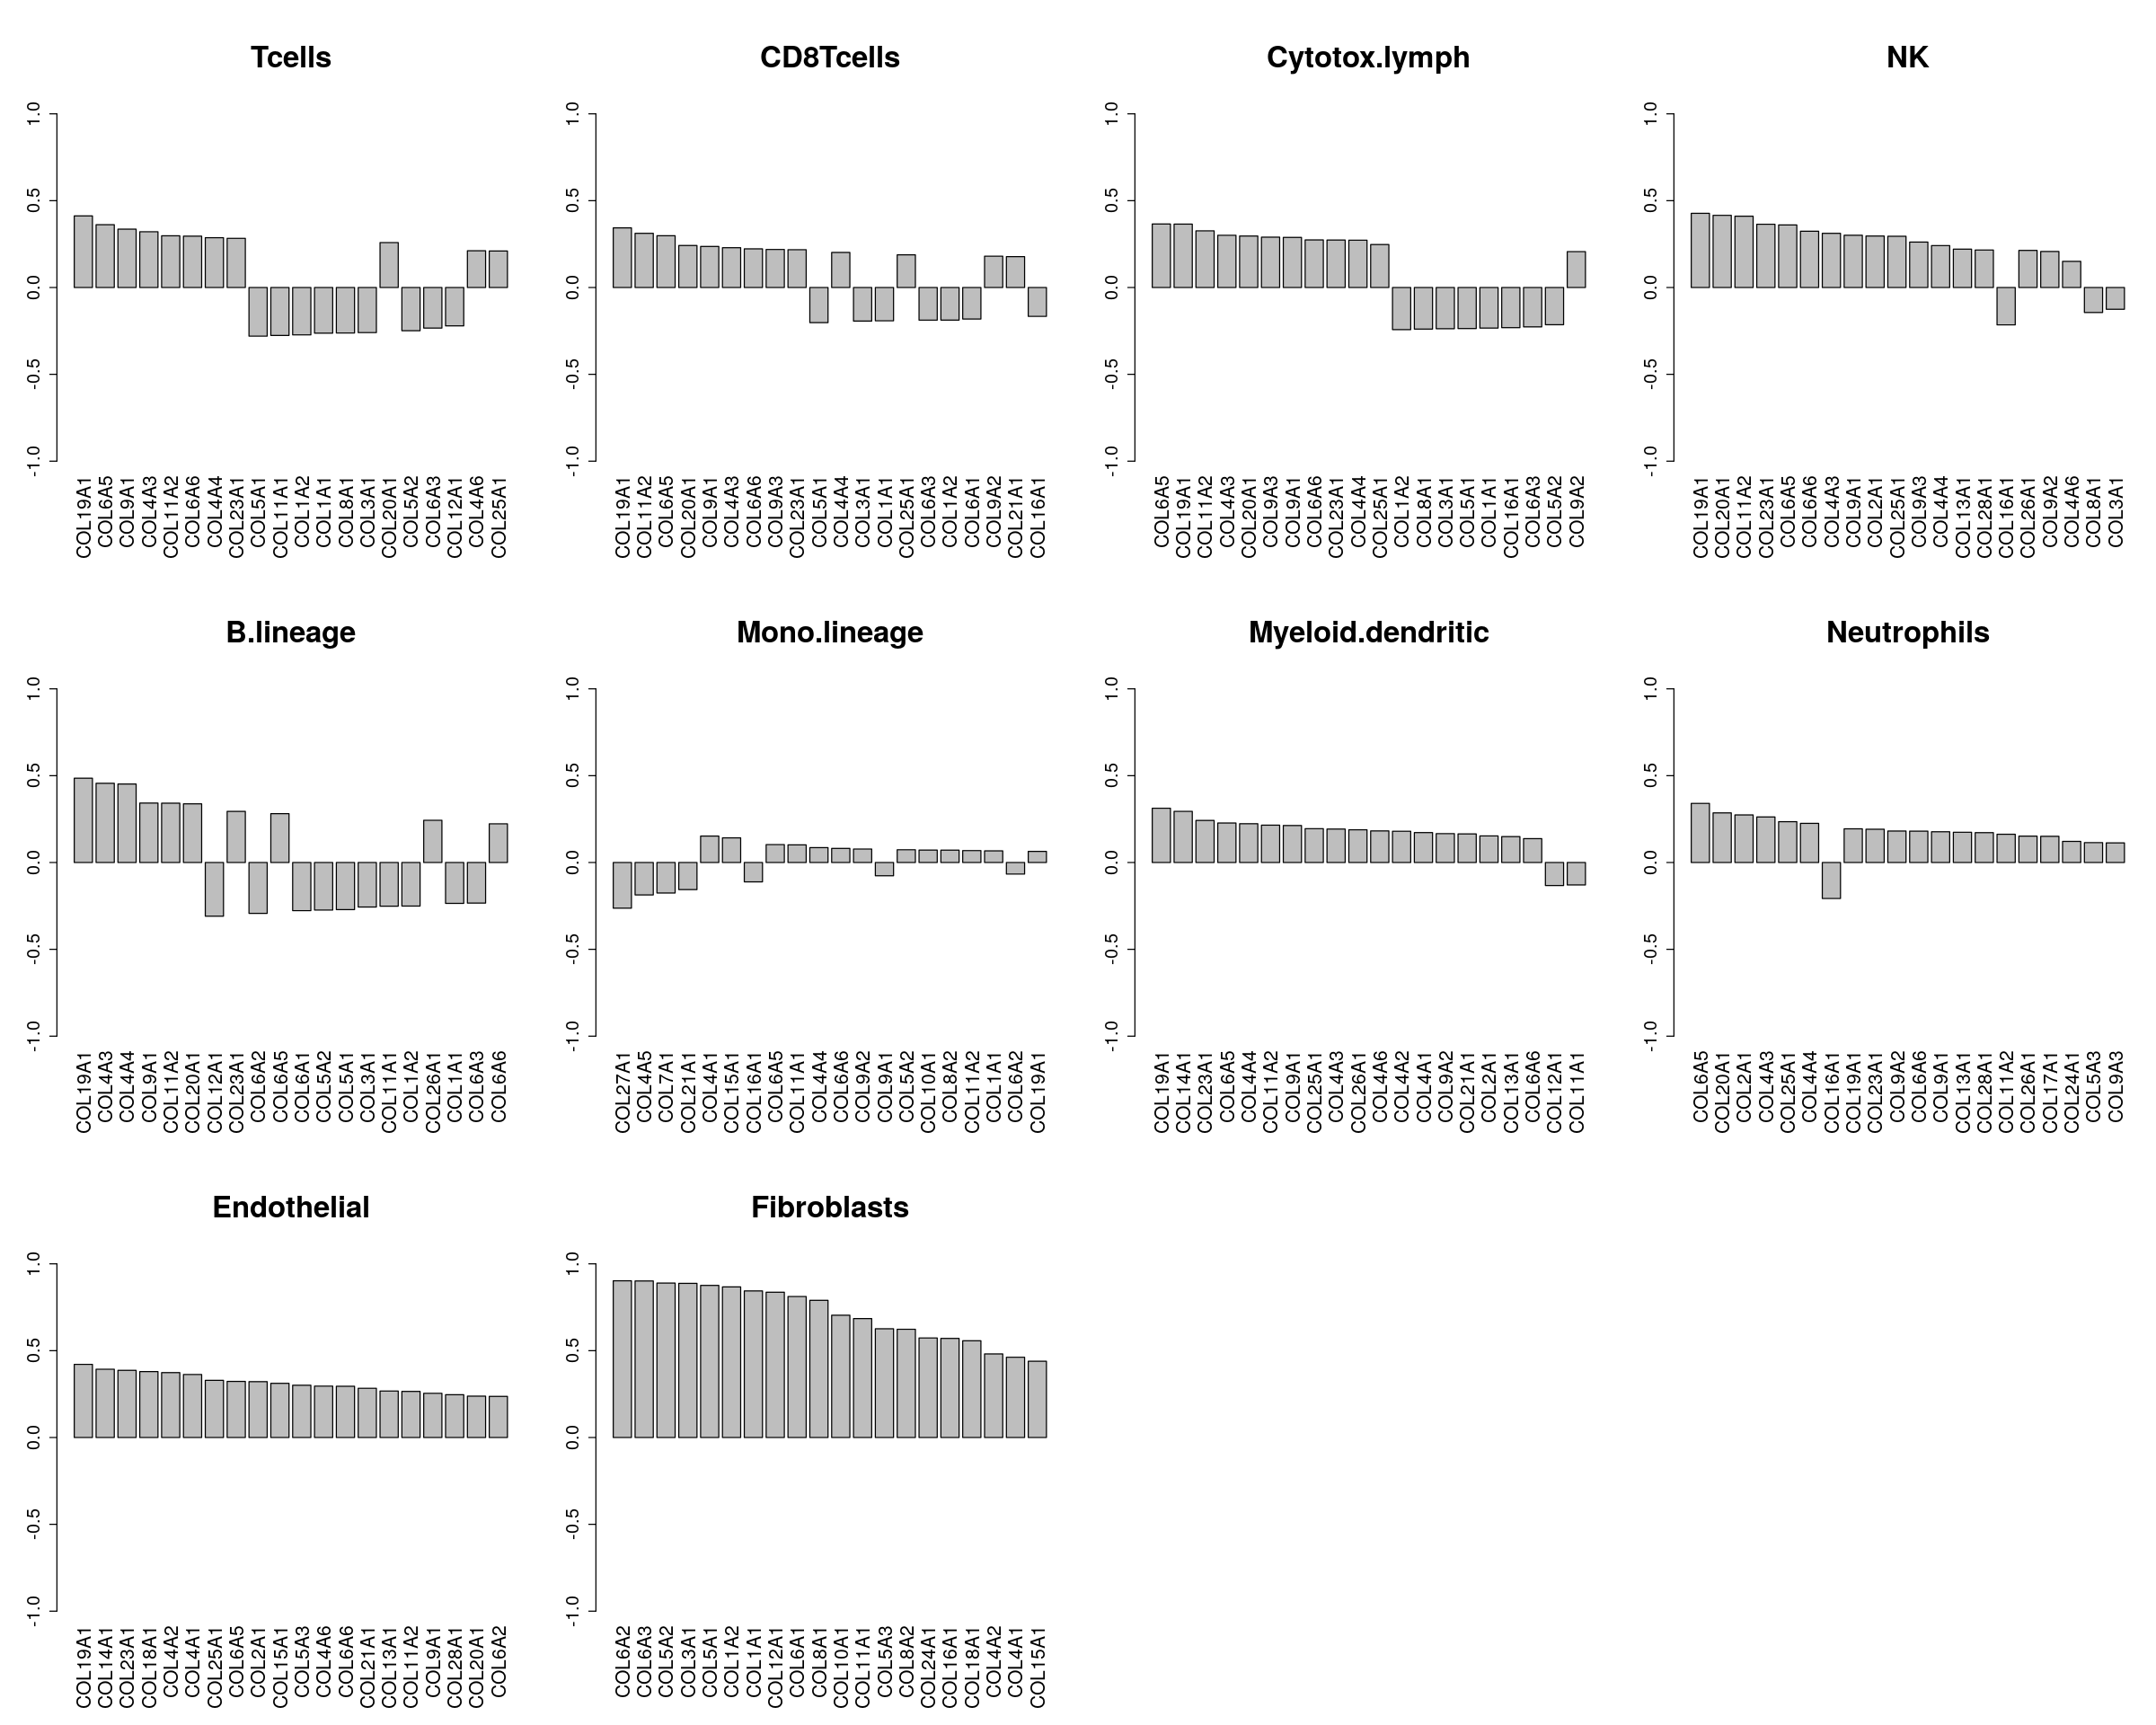

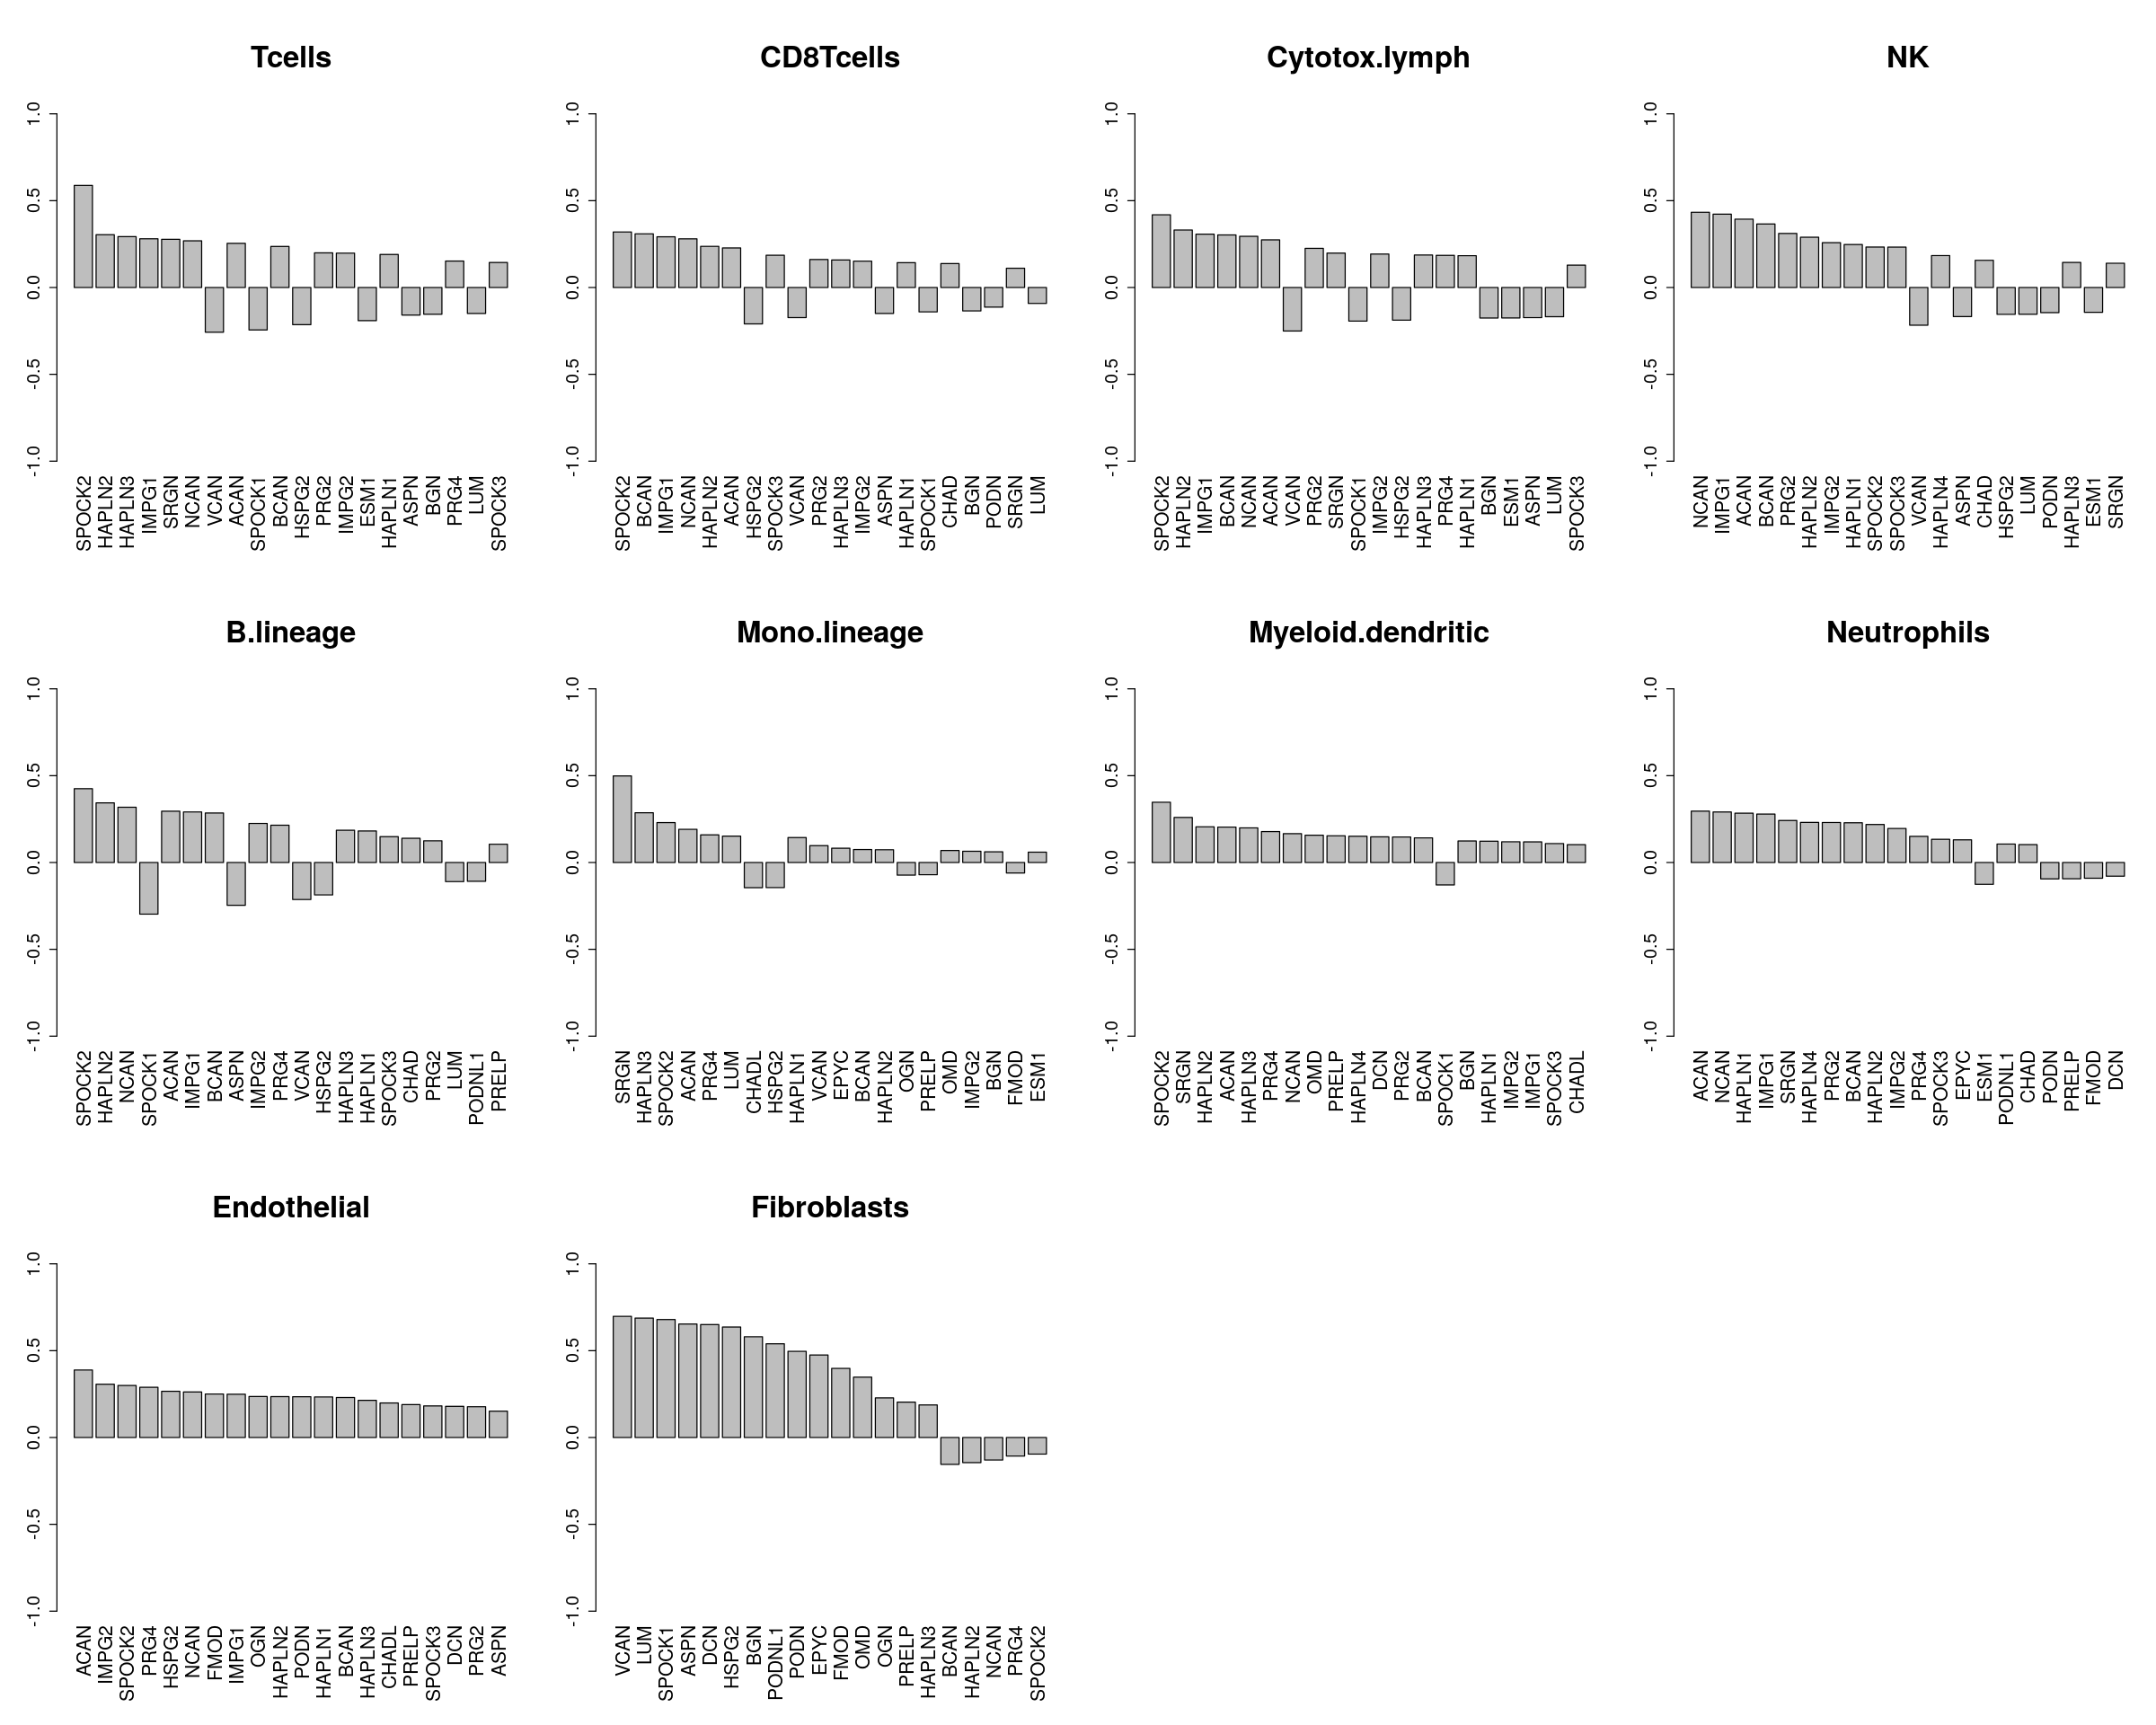

In [16]:
# Find the top 10 genes that are most correlated with each immune cell type
for (category in unique(matrisome_core$Matrisome.Category)){
  matrisome_category <- filter(matrisome_core,
                               matrisome_core$Matrisome.Category == category)

  correlations_category <- correlations[match(matrisome_category$Gene.Symbol,
                                              gene_symbols), ]
                               
  top10_genes <- lapply(colnames(correlations_category), function(cell_type) {
    top_genes <- row.names(correlations_category)[order(abs(correlations_category[, cell_type]),
                                               decreasing = TRUE)[1:20]]
    gene_symbols[match(top_genes, rownames(counts))]
  }) |>
    as.data.frame() |>
    set_names(colnames(correlations_mat_core))
  
  top10_correlations <- lapply(colnames(correlations_category), function(cell_type) {
    top_genes <- correlations_category[order(abs(correlations_category[, cell_type]),
        decreasing = TRUE)[1:20], cell_type]
  }) |>
    as.data.frame() |>
    set_names(colnames(correlations_category))
  
  print(category)

  options(repr.plot.width = 20, repr.plot.height = 16)
  par(mfrow = c(3, 4), mar = c(8, 4, 8, 1))
  
  for (celltype in colnames(top10_genes)){
    barplot(top10_correlations[[celltype]],
            names.arg = top10_genes[[celltype]],
            las = 3,
            cex.names = 1.6,
            cex.axis = 1.5,
            cex.lab = 3,
            main = celltype,
            ylim = c(-1, 1),
            ylab = "",
            xlab = "",
            cex.main = 2.5)
  }
}